## Importing packages

In [ ]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
#install_all_packages()
load_library_packages()

## Importing and Cleaning dataset

In [2]:
df_during <- read_excel(path = here('Data','during_dataset.xlsx'))
df_during <- data.frame(df_during)
unique(sapply(df_during, class))
df_during <- df_during[complete.cases(df_during), ]
dim(df_during)
head(df_during)

[1] "numeric"

[1] 1250   44

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,...,soccer,tennis,volleyball,basketball,swimming,surfing,yoga,pilates,fighting,other_sports
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Converting dataset types and labels

In [3]:
df_during$PA_intensity[df_during$PA_intensity == 4] <- 0
df_during$PA_duration[df_during$PA_duration == 5] <- 0
df_during$PA_weekly_frequency[df_during$PA_weekly_frequency == 4] <- 0
df_during$PA_practice_during <- ifelse(df_during$PA_practice_during == 0, 1, 0)
df_during$sedentary_time_range_during[df_during$sedentary_time_range_during < 5] <- 0
df_during$sedentary_time_range_during[df_during$sedentary_time_range_during == 5] <- 1
sum(df_during[, "PA_practice_during"])

[1] 900

In [4]:
sports <- c("running","hiking","cycling",
            "muscle_training","soccer","tennis",
            "volleyball","basketball","swimming",
            "surfing","yoga","pilates","fighting","other_sports")

df_during$PA_number <- rowSums(df_during[, sports])

### Separing barriers from dataset

In [5]:
colnames(df_during)
head(df_during)

[1] "PA_barrier_time_family_responsabilities"
 [2] "PA_barrier__tiredness"                  
 [3] "PA_barrier_places_closed_dangerous"     
 [4] "PA_barrier_money"                       
 [5] "PA_barrier_time_convenience"            
 [6] "PA_barrier_hard_work"                   
 [7] "PA_barrier_no_interest"                 
 [8] "PA_barrier_none"                        
 [9] "PA_easiness_outdoor_activities"         
[10] "PA_easiness_professional_guidance"      
[11] "PA_easiness_unguided"                   
[12] "PA_easiness_music"                      
[13] "PA_easiness_collective"                 
[14] "PA_easiness_home_activity"              
[15] "PA_easiness_family_activity"            
[16] "PA_easiness_home_space"                 
[17] "PA_easiness_home_equipament"            
[18] "PA_easiness_others"                     
[19] "PA_weekly_frequency"                    
[20] "PA_intensity"                           
[21] "PA_duration"                            
[22] "PA_practice_during"                     
[23] "sedentary_time_range_during"            
[24] "sex"                                    
[25] "age_range"                              
[26] "martialStatus"                          
[27] "co.resident_range"                      
[28] "rooms_range"                            
[29] "income_range"                           
[30] "scholarity"                             
[31] "running"                                
[32] "hiking"                                 
[33] "cycling"                                
[34] "muscle_training"                        
[35] "soccer"                                 
[36] "tennis"                                 
[37] "volleyball"                             
[38] "basketball"                             
[39] "swimming"                               
[40] "surfing"                                
[41] "yoga"                                   
[42] "pilates"                                
[43] "fighting"                               
[44] "other_sports"                           
[45] "PA_number"

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,...,tennis,volleyball,basketball,swimming,surfing,yoga,pilates,fighting,other_sports,PA_number
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2


In [24]:
df_during[1:18] <- lapply(df_during[1:18], as.factor)
df_during_barriers <- df_during[, 1:8]
dim(df_during_barriers)
head(df_during_barriers)

[1] 1218    8

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0


In [25]:
names(df_during_barriers)[8] <- 'PA_barrier_percieve'

### Removing Strangers

In [26]:
differ_p <- (   df_during$PA_duration == 0 
                | df_during$PA_intensity == 0 
                | df_during$PA_weekly_frequency == 0
                | df_during$PA_number == 0
            )
strange_p <- df_during$PA_practice_during == 1 & differ_p
df_during <- df_during[!strange_p, ]
df_during_barriers <- df_during_barriers[!strange_p, ]
table(strange_p)

differ_dp <- ( df_during$PA_duration != 0 
                | df_during$PA_intensity != 0 
                | df_during$PA_weekly_frequency != 0
                | df_during$PA_number != 0
            ) 
strange_dp <- df_during$PA_practice_during == 0 & differ_dp 


table(strange_dp)
df_during <- df_during[!strange_dp, ]
df_during_barriers <- df_during_barriers[!strange_dp, ]

strange_p
FALSE 
 1218 

strange_dp
FALSE 
 1218 

### Agregate barriers and clean them


In [27]:

time_barrier_1 <- ifelse(df_during_barriers$PA_barrier_time_family_responsabilities=='0',0,1)
time_barrier_2 <- ifelse(df_during_barriers$PA_barrier_time_convenience=='0',0,1)


hard_barrier_1 <- ifelse(df_during_barriers$PA_barrier__tiredness=='0',0,1)
hard_barrier_2 <- ifelse(df_during_barriers$PA_barrier_hard_work=='0',0,1)


interest_barrier_1 <- ifelse(df_during_barriers$PA_barrier_no_interest=='0',0,1)
interest_barrier_2 <- ifelse(df_during_barriers$PA_barrier_percieve=='0',0,1)


df_during_barriers$PA_barrier_time <- (time_barrier_1 | time_barrier_2) + 0 
df_during_barriers$PA_barrier_hard <- (hard_barrier_1 | hard_barrier_2) + 0
df_during_barriers$PA_barrier_interest <- (interest_barrier_1 | interest_barrier_2) + 0

In [28]:
df_during_barriers$PA_barrier_time_family_responsabilities <- NULL
df_during_barriers$PA_barrier_time_convenience <- NULL

df_during_barriers$PA_barrier__tiredness <- NULL
df_during_barriers$PA_barrier_hard_work <- NULL

df_during_barriers$PA_barrier_no_interest <- NULL
df_during_barriers$PA_barrier_percieve <- NULL

In [29]:
names(df_during_barriers)

[1] "PA_barrier_places_closed_dangerous" "PA_barrier_money"                  
[3] "PA_barrier_time"                    "PA_barrier_hard"                   
[5] "PA_barrier_interest"

## Clustering - Kmodes

In [140]:
df_during_barriers_dist <- distinct(df_during_barriers)

### Silhoette 
<hr />

In [114]:
df_matrix <- data.matrix(df_during_barriers_dist) - 1
similarity_matrix <- df_matrix %*% t(df_matrix) + ((!df_matrix) + 0) %*% ((!t(df_matrix)) + 0)
dissimilarity_matrix <- ncol(df_during_barriers_dist) - similarity_matrix
head(dissimilarity_matrix)

0,1,2,1,1,2,2,2,2,3,...,2,3,3,3,4,1,4,3,3,5
1,0,3,2,2,3,3,1,3,2,...,1,4,2,4,3,2,5,2,2,4
2,3,0,3,3,2,2,4,4,3,...,2,1,1,3,2,1,2,3,5,3
1,2,3,0,2,1,1,1,1,2,...,3,4,4,2,3,2,3,4,2,4
1,2,3,2,0,3,3,3,1,4,...,3,2,4,2,5,2,3,2,2,4
2,3,2,1,3,0,2,2,2,1,...,2,3,3,3,2,1,2,3,3,3


#### Scanning parameters


In [86]:
source(here('Modules','modules.R'))
nseed <- 10
nk <- nrow(distinct(df_during_barriers))
ks_by_seed <- data.frame(matrix(NA, nrow = nseed, ncol = nk-1))
for (seed in 1:nseed) {
    silhouette_scs <- c()
    for (k in 2:nk) {
        sc <- silhouette_values_kmodes(
            num_clusters = k,
            df = df_during_barriers_dist,
            diss_matrix = dissimilarity_matrix,
            iters = 200,
            s = seed)[[1]]

        silhouette_scs <- append(silhouette_scs, sc)
    }

    ks_by_seed[seed, ] <- silhouette_scs
}

write.csv(
    ks_by_seed,
    "../../Data/silhouette_kmodes_or_barriers.csv", row.names = FALSE
)

#### Results

In [99]:
scs <- read.csv("../../Data/silhouette_kmodes_or_barriers.csv")
scs[, ncol(scs)+1] <-  seq.int(nrow(scs))
colnames(scs) <- append(2:nrow(distinct(df_during_barriers)), "seed")
scs

2,3,4,5,6,7,8,9,10,11,...,20,21,22,23,24,25,26,27,28,seed
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.1832950,0.1066201,0.2122101,0.2930489,0.3028318,0.3097128,0.3399096,0.3888475,0.3866153,0.3043550,...,0.08871882,0.10476190,0.08571429,0.06785714,0.06785714,0.05952381,0.03571429,0.01785714,0,1
0.1633956,0.2595444,0.2446883,0.2996920,0.3086918,0.3500230,0.3321504,0.3233707,0.3122038,0.2718660,...,0.06547619,0.04761905,0.07142857,0.05357143,0.03571429,0.03571429,0.03571429,0.01785714,0,2
0.1633956,0.2565790,0.2909361,0.2720171,0.3175264,0.3219552,0.3940723,0.3332049,0.2540566,0.2125425,...,0.12136673,0.12136673,0.10350959,0.07232143,0.03571429,0.03571429,0.03571429,0.01785714,0,3
0.2018361,0.2384052,0.3056988,0.3329515,0.3560722,0.3494758,0.2992966,0.2973962,0.2838931,0.2832979,...,0.12976190,0.11190476,0.07142857,0.07142857,0.07142857,0.05357143,0.03571429,0.01785714,0,4
0.1832950,0.1908871,0.2576881,0.2961977,0.3219347,0.1973977,0.3243196,0.3130858,0.3016141,0.2813377,...,0.12136673,0.12136673,0.11279762,0.11279762,0.10238095,0.08452381,0.06666667,0.01785714,0,5
0.2018361,0.1066201,0.2944669,0.2857261,0.2235789,0.2266287,0.2185569,0.2593267,0.2291069,0.2291069,...,0.08630952,0.10300454,0.08928571,0.08928571,0.07142857,0.05357143,0.03571429,0.01785714,0,6
0.2848485,0.2483980,0.3145702,0.2117151,0.2556394,0.3101346,0.3352739,0.4138852,0.3524949,0.3502627,...,0.10357143,0.08571429,0.10357143,0.08571429,0.08690476,0.06904762,0.05119048,0.01785714,0,7
0.2215162,0.2565790,0.2775133,0.2947760,0.2723629,0.3029225,0.2608002,0.1878483,0.2444788,0.1942258,...,0.14613095,0.14613095,0.12827381,0.05357143,0.03571429,0.03571429,0.03571429,0.01785714,0,8
0.1445689,0.2074532,0.1912873,0.2378232,0.2777682,0.3079308,0.3147096,0.3274364,0.3108547,0.2852672,...,0.12023810,0.10238095,0.05357143,0.05357143,0.05357143,0.05357143,0.03571429,0.01785714,0,9


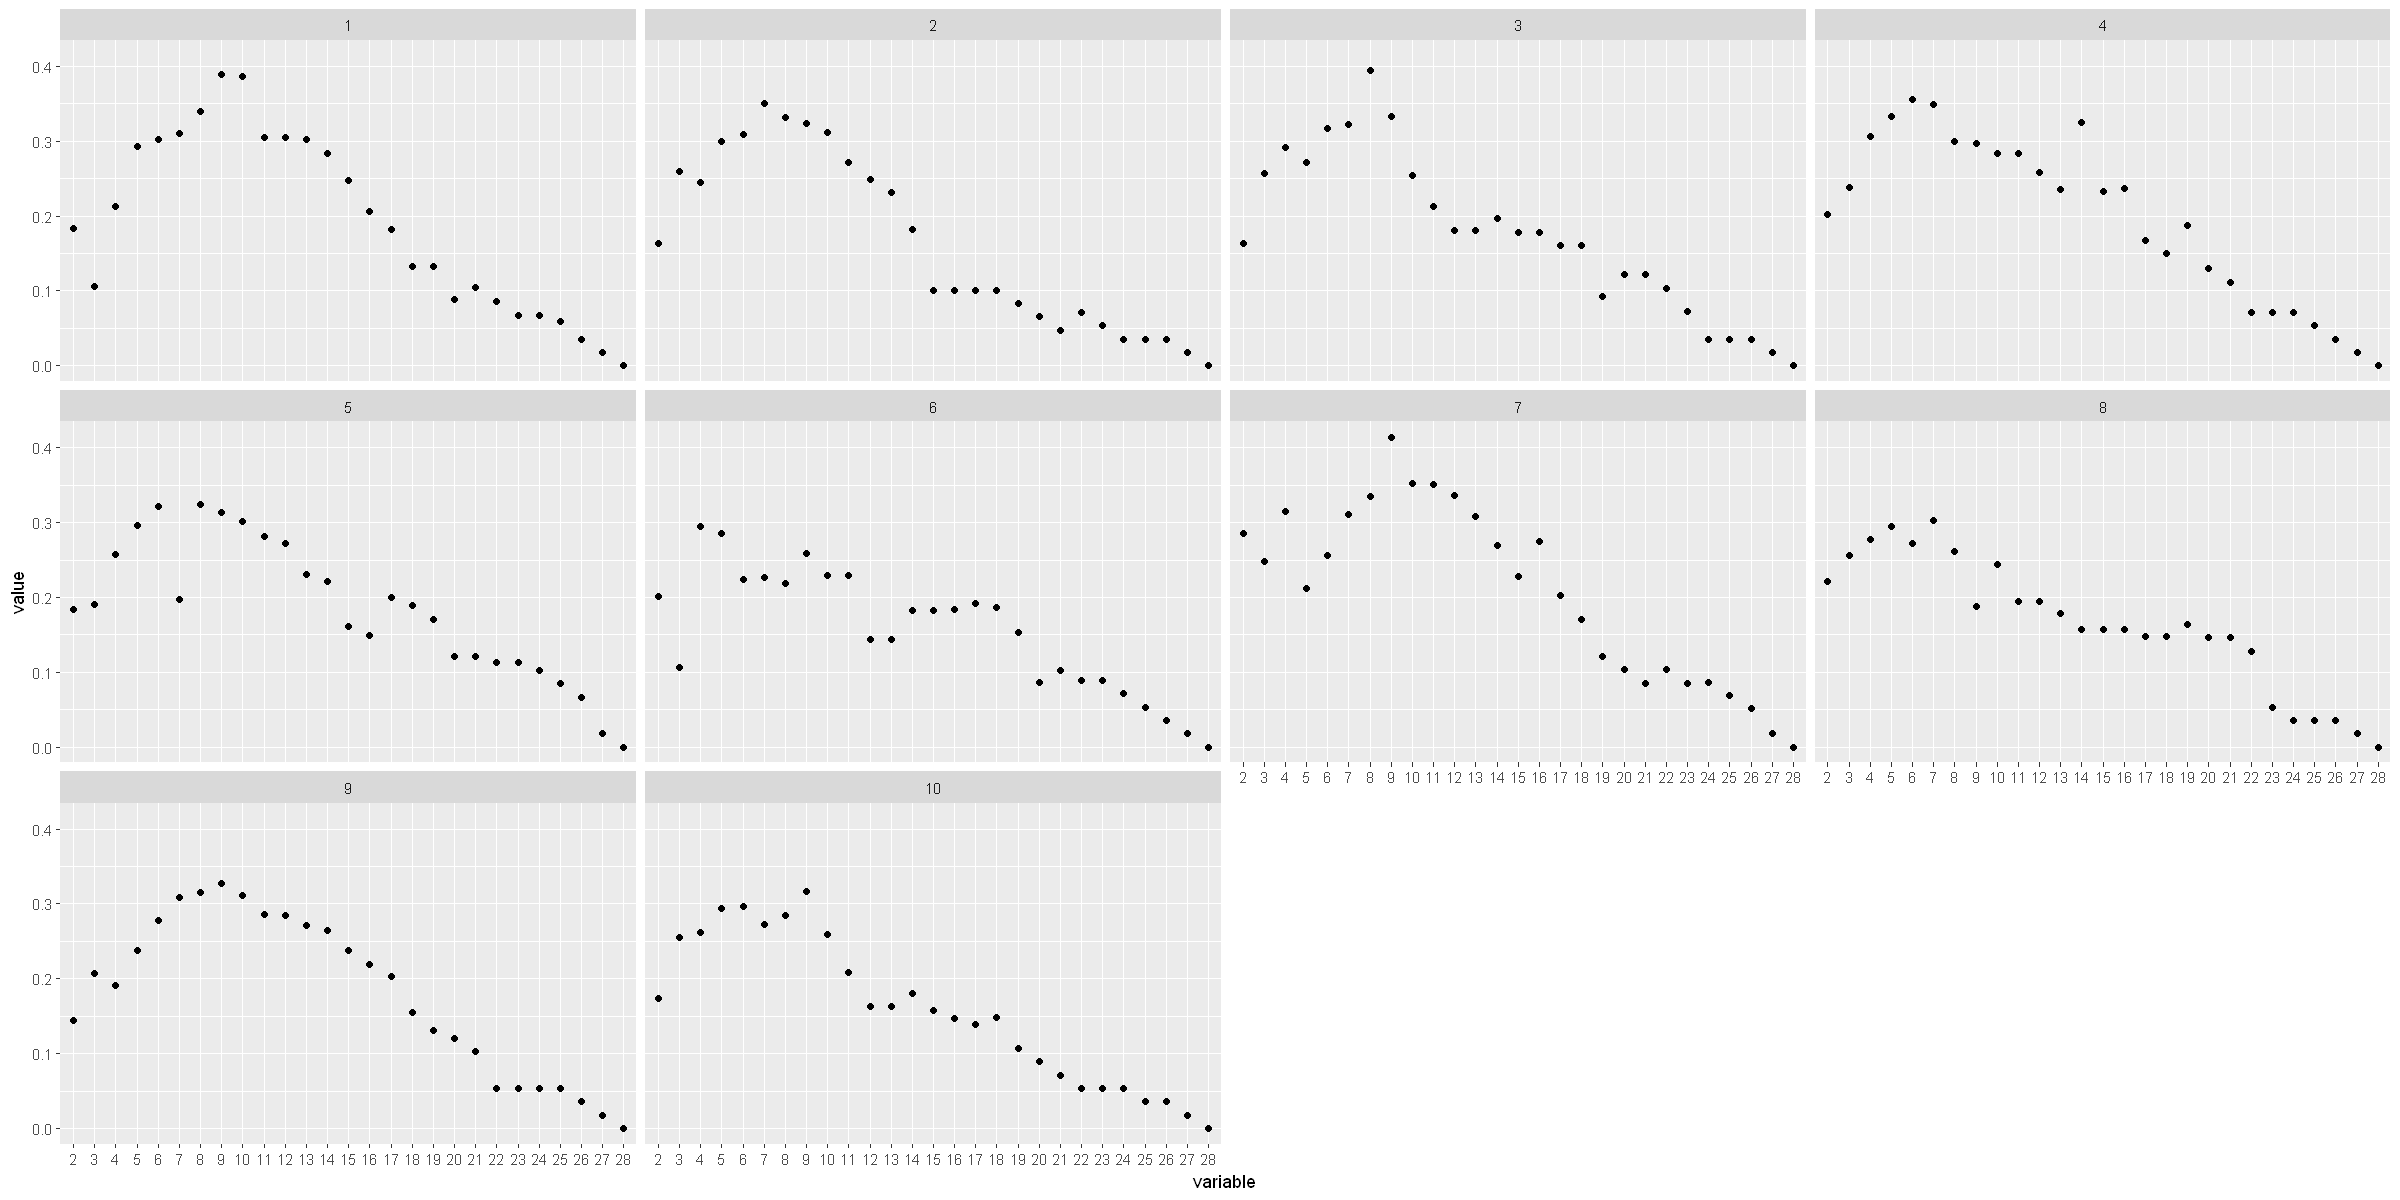

In [103]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot(
   data=melt(scs, id.vars='seed'), aes(x = variable, y = value)
) + geom_point() + facet_wrap(~ seed) 


####  Best K and best seed by highest sample mean

In [153]:
print("Best K")
best_K_kmodes <- match(max(apply(scs, 2, mean)[1:ncol(scs)-1]), apply(scs, 2, mean))
print(best_K_kmodes)
print("Best Seed")
best_seed_kmodes <- match(max(scs[, best_K_kmodes]), scs[, best_K_kmodes])
print(best_seed_kmodes)
print("Silhouette")
print(max(scs[, best_K_kmodes]))

[1] "Best K"
[1] 8
[1] "Best Seed"
[1] 7


#### Evaluating the silhuette coefficient for best seed

In [ ]:
# silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=68)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() + 
#   theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

In [ ]:
# silhoutte_result <-  silhouette_values(num_clusters=4, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=62)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() 

In [ ]:
# silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=13)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() 

### Fisher

<hr />

In [115]:
source(here('Modules','modules.R'))
nseed <- 10
nk <- nrow(distinct(df_during_barriers))
ks_by_seed <- data.frame(matrix(NA, nrow = nseed, ncol = nk-1))
for (seed in 1:nseed) {
    fishers <- c()
    for (k in 2:nk) {
        fs <- fisher_values_kmodes(k, df_during_barriers_dist, 200, seed)[[1]]
        fishers <- append(fishers, fs)
    }

    ks_by_seed[seed, ] <- fishers
}

write.csv(
    ks_by_seed,
    "../../Data/fisher_kmodes_or_barriers.csv", row.names = FALSE
)

In [118]:
fs <- read.csv("../../Data/fisher_kmodes_or_barriers.csv")
fs[, ncol(fs)+1] <-  seq.int(nrow(fs))
colnames(fs) <- append(2:nk, "seed")
head(fs[order(apply(fs, 1, sum), decreasing=TRUE), ])

,2,3,4,5,6,7,8,9,10,11,...,20,21,22,23,24,25,26,27,28,seed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>
1,1.2173913,1.400000,1.4923077,3.368421,4.450000,4.722222,5.482759,7.454545,7.666667,8.400000,...,22.75000,22.42857,27.00000,33.8,43.5,57.00000,89,183,Inf,1
2,0.1818182,2.396825,2.5000000,4.157895,4.612903,4.266667,4.586207,5.320000,8.333333,9.000000,...,22.25000,26.42857,27.33333,33.4,43.5,59.00000,90,183,Inf,2
3,0.2121212,2.606061,3.4583333,3.829268,5.882353,4.333333,6.217391,7.526316,8.111111,8.764706,...,23.00000,25.85714,30.66667,35.8,46.0,60.33333,88,181,Inf,3
4,0.7528090,0.600000,0.8153846,1.720000,1.900000,2.025641,2.157895,3.714286,4.416667,4.739130,...,21.75000,25.85714,31.66667,38.6,43.0,58.33333,91,185,Inf,4
5,1.2173913,2.375000,3.2745098,3.736842,5.258065,4.777778,6.913043,7.727273,7.952381,8.200000,...,20.25000,24.14286,29.00000,33.8,41.5,57.66667,90,183,Inf,5
6,0.7528090,1.400000,2.9111111,2.951220,1.956522,2.000000,2.210526,3.642857,3.888889,4.307692,...,12.81818,23.00000,26.00000,31.8,41.0,55.66667,87,181,Inf,6


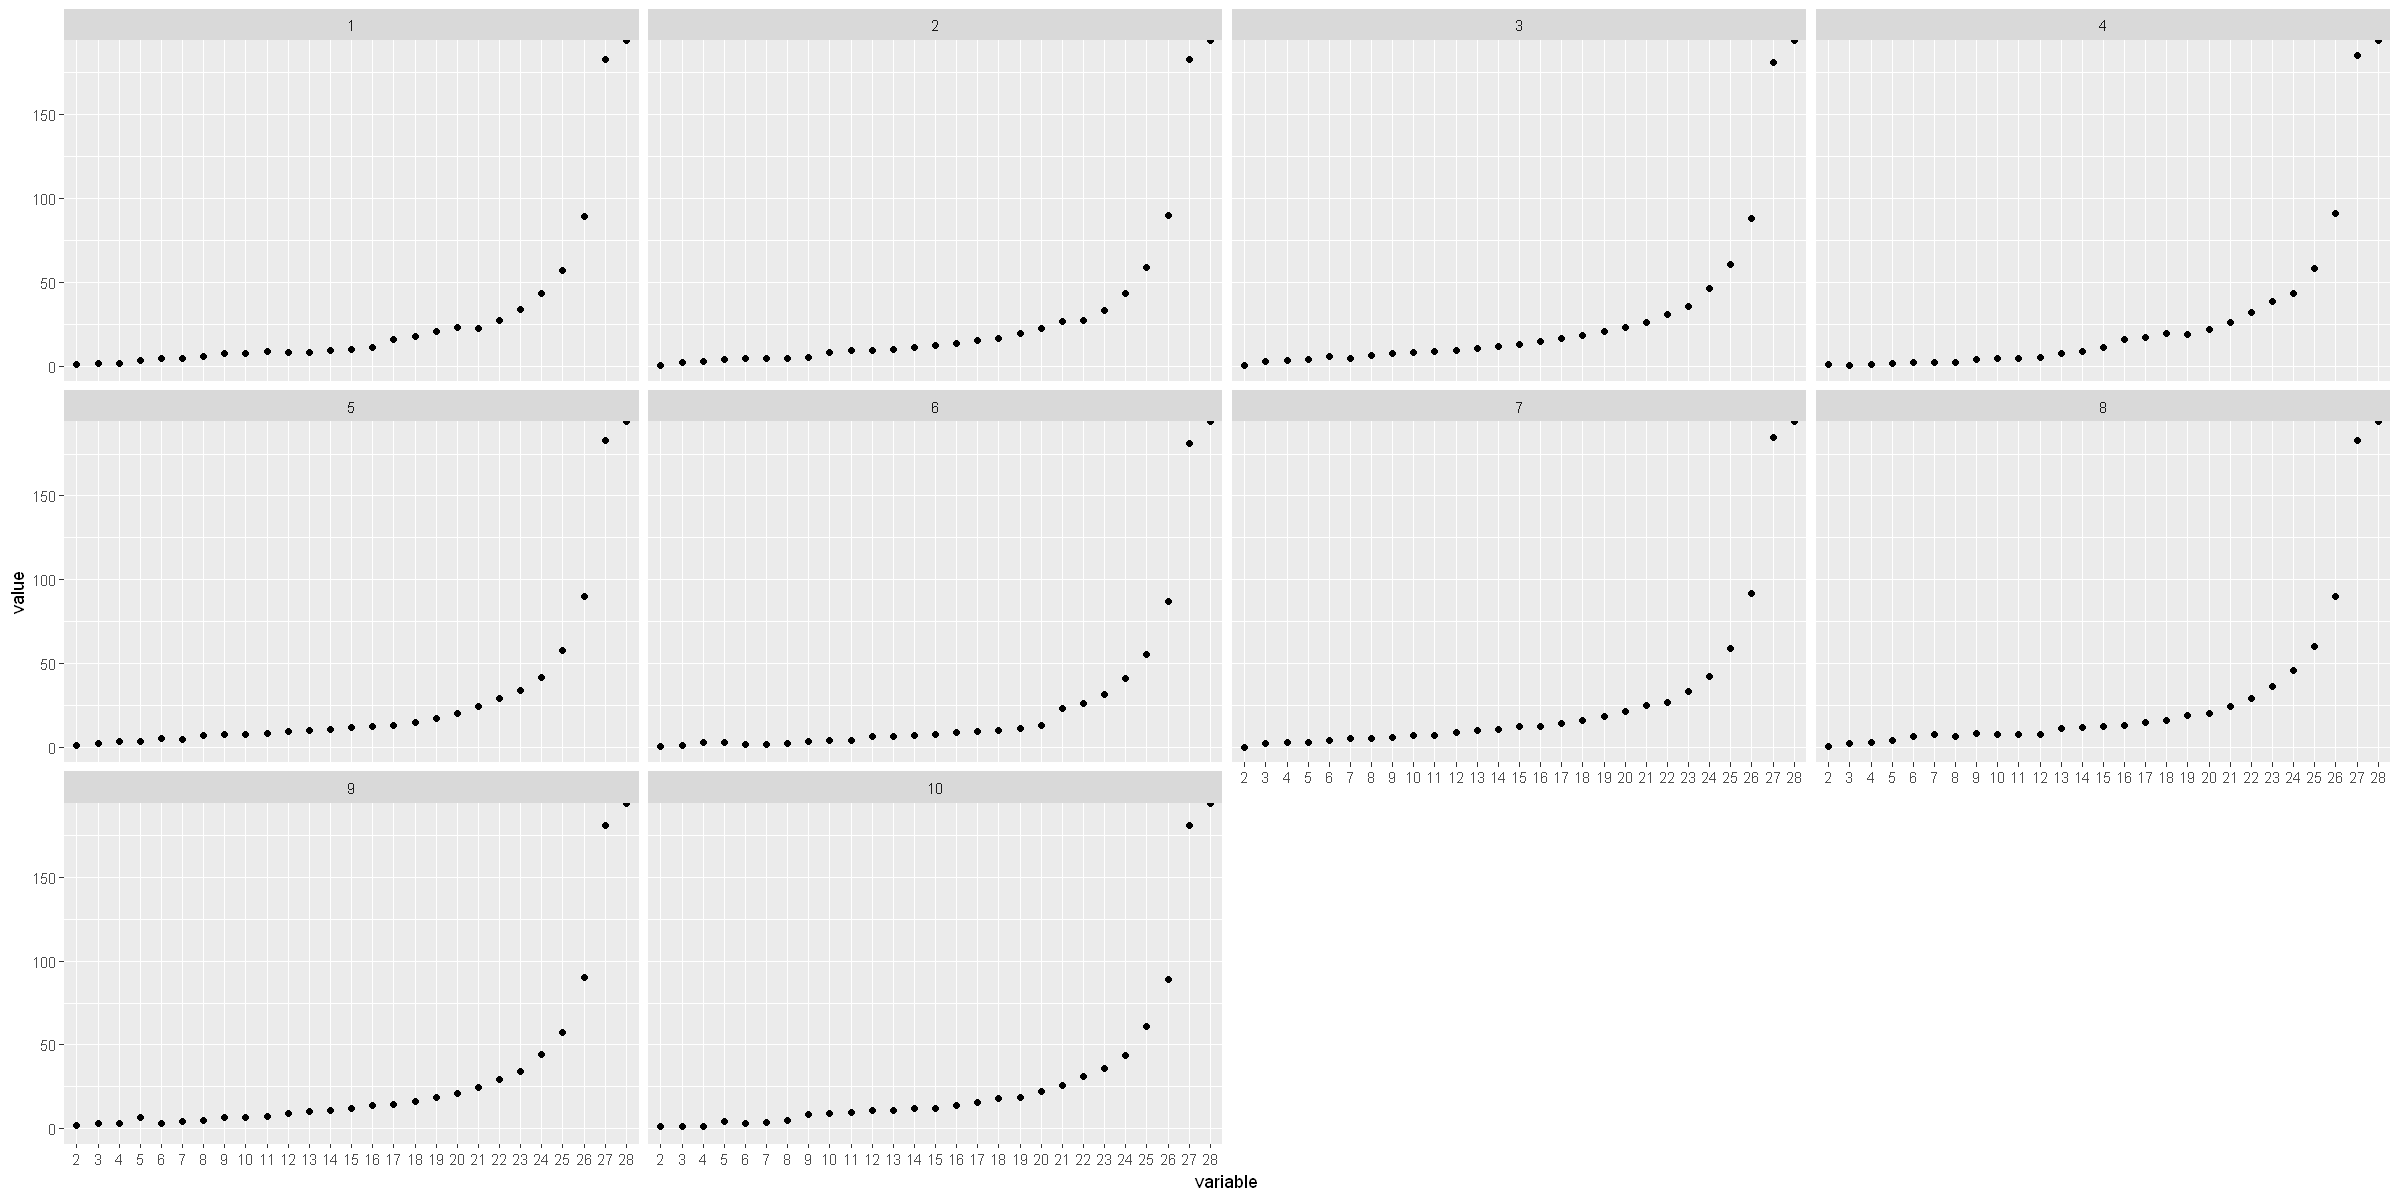

In [120]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot(
   data=melt(fs, id.vars='seed'), aes(x = variable, y = value)
) + geom_point() + facet_wrap(~ seed) 


## Exploring Kmodes best k

In [154]:

df_during_barriers_dist$cluster <- kmodes_seed(df_during_barriers_dist, best_K_kmodes, max_iter=200, seed=best_seed_kmodes)$cluster
head(df_during_barriers_dist)

,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time,PA_barrier_hard,PA_barrier_interest,cluster
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>
1,1,0,0,0,0,3
2,1,0,0,0,1,4
3,0,0,1,0,0,5
4,1,0,0,1,0,8
5,1,1,0,0,0,3
6,0,0,0,1,0,8


In [155]:
joint <- c(
    'PA_barrier_places_closed_dangerous'='PA_barrier_places_closed_dangerous',
    'PA_barrier_money' = 'PA_barrier_money',
    'PA_barrier_time' = 'PA_barrier_time',
    'PA_barrier_hard' = 'PA_barrier_hard',
    'PA_barrier_interest' = 'PA_barrier_interest'
)

df_during_barriers <- left_join(df_during_barriers, df_during_barriers_dist, by = joint)
df_during$cluster <- df_during_barriers$cluster
nrow(df_during_barriers)

[1] 1218

In [195]:
table(df_during$cluster)


  1   2   3   4   5   6   7   8 
 33  42 352  41  94 300  93 263 

### Profile Plots
<hr />

#### Practice of Exercise 

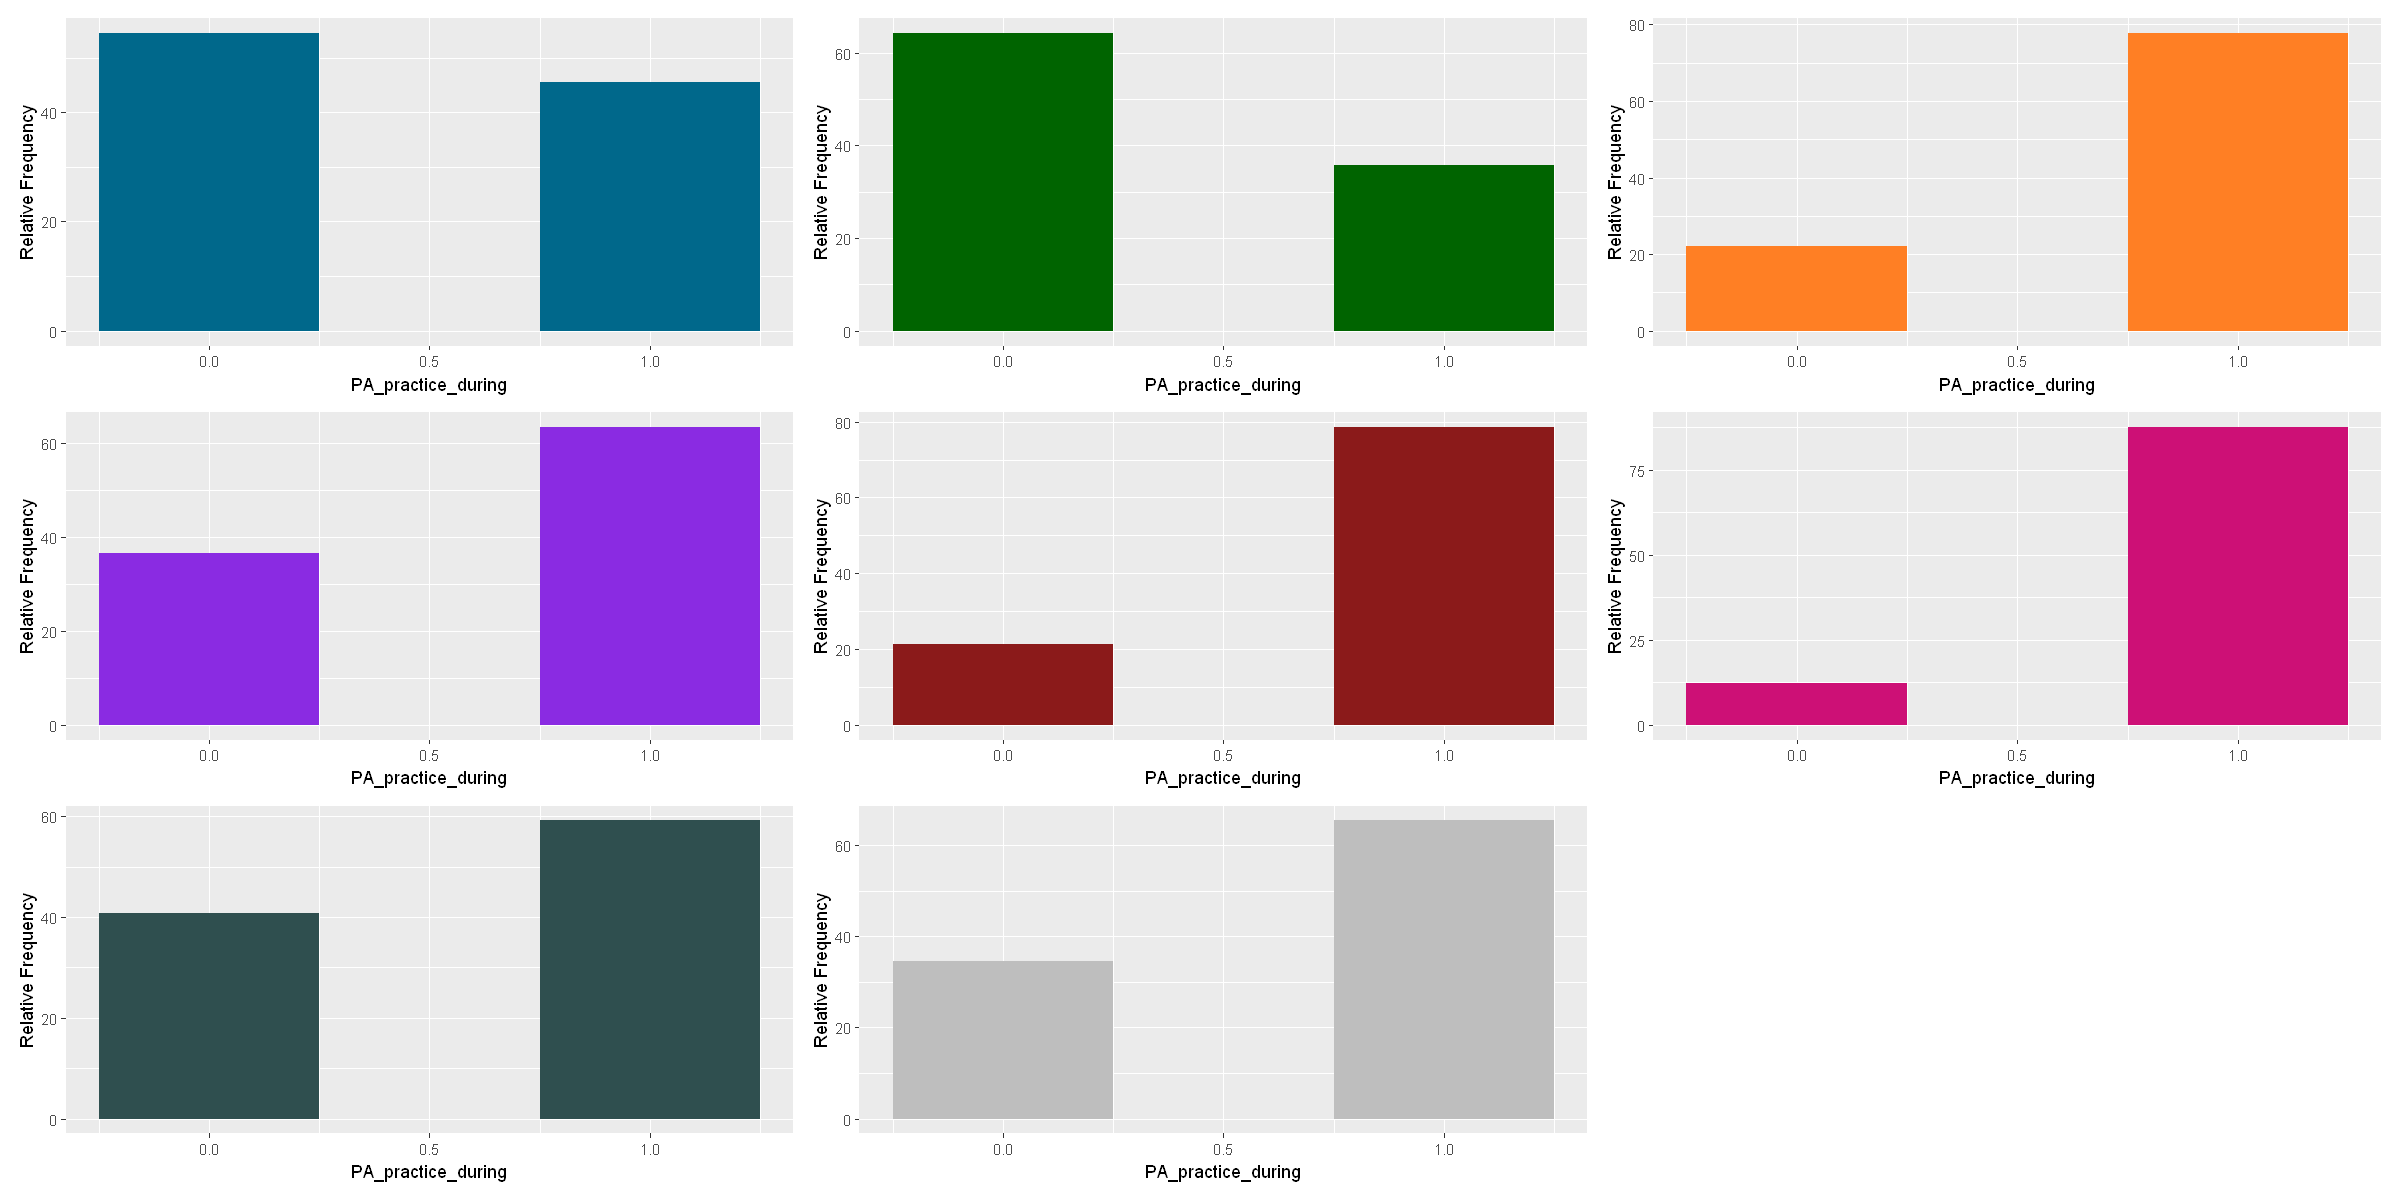

In [169]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_practice_during, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 3,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Sedentary Behavior

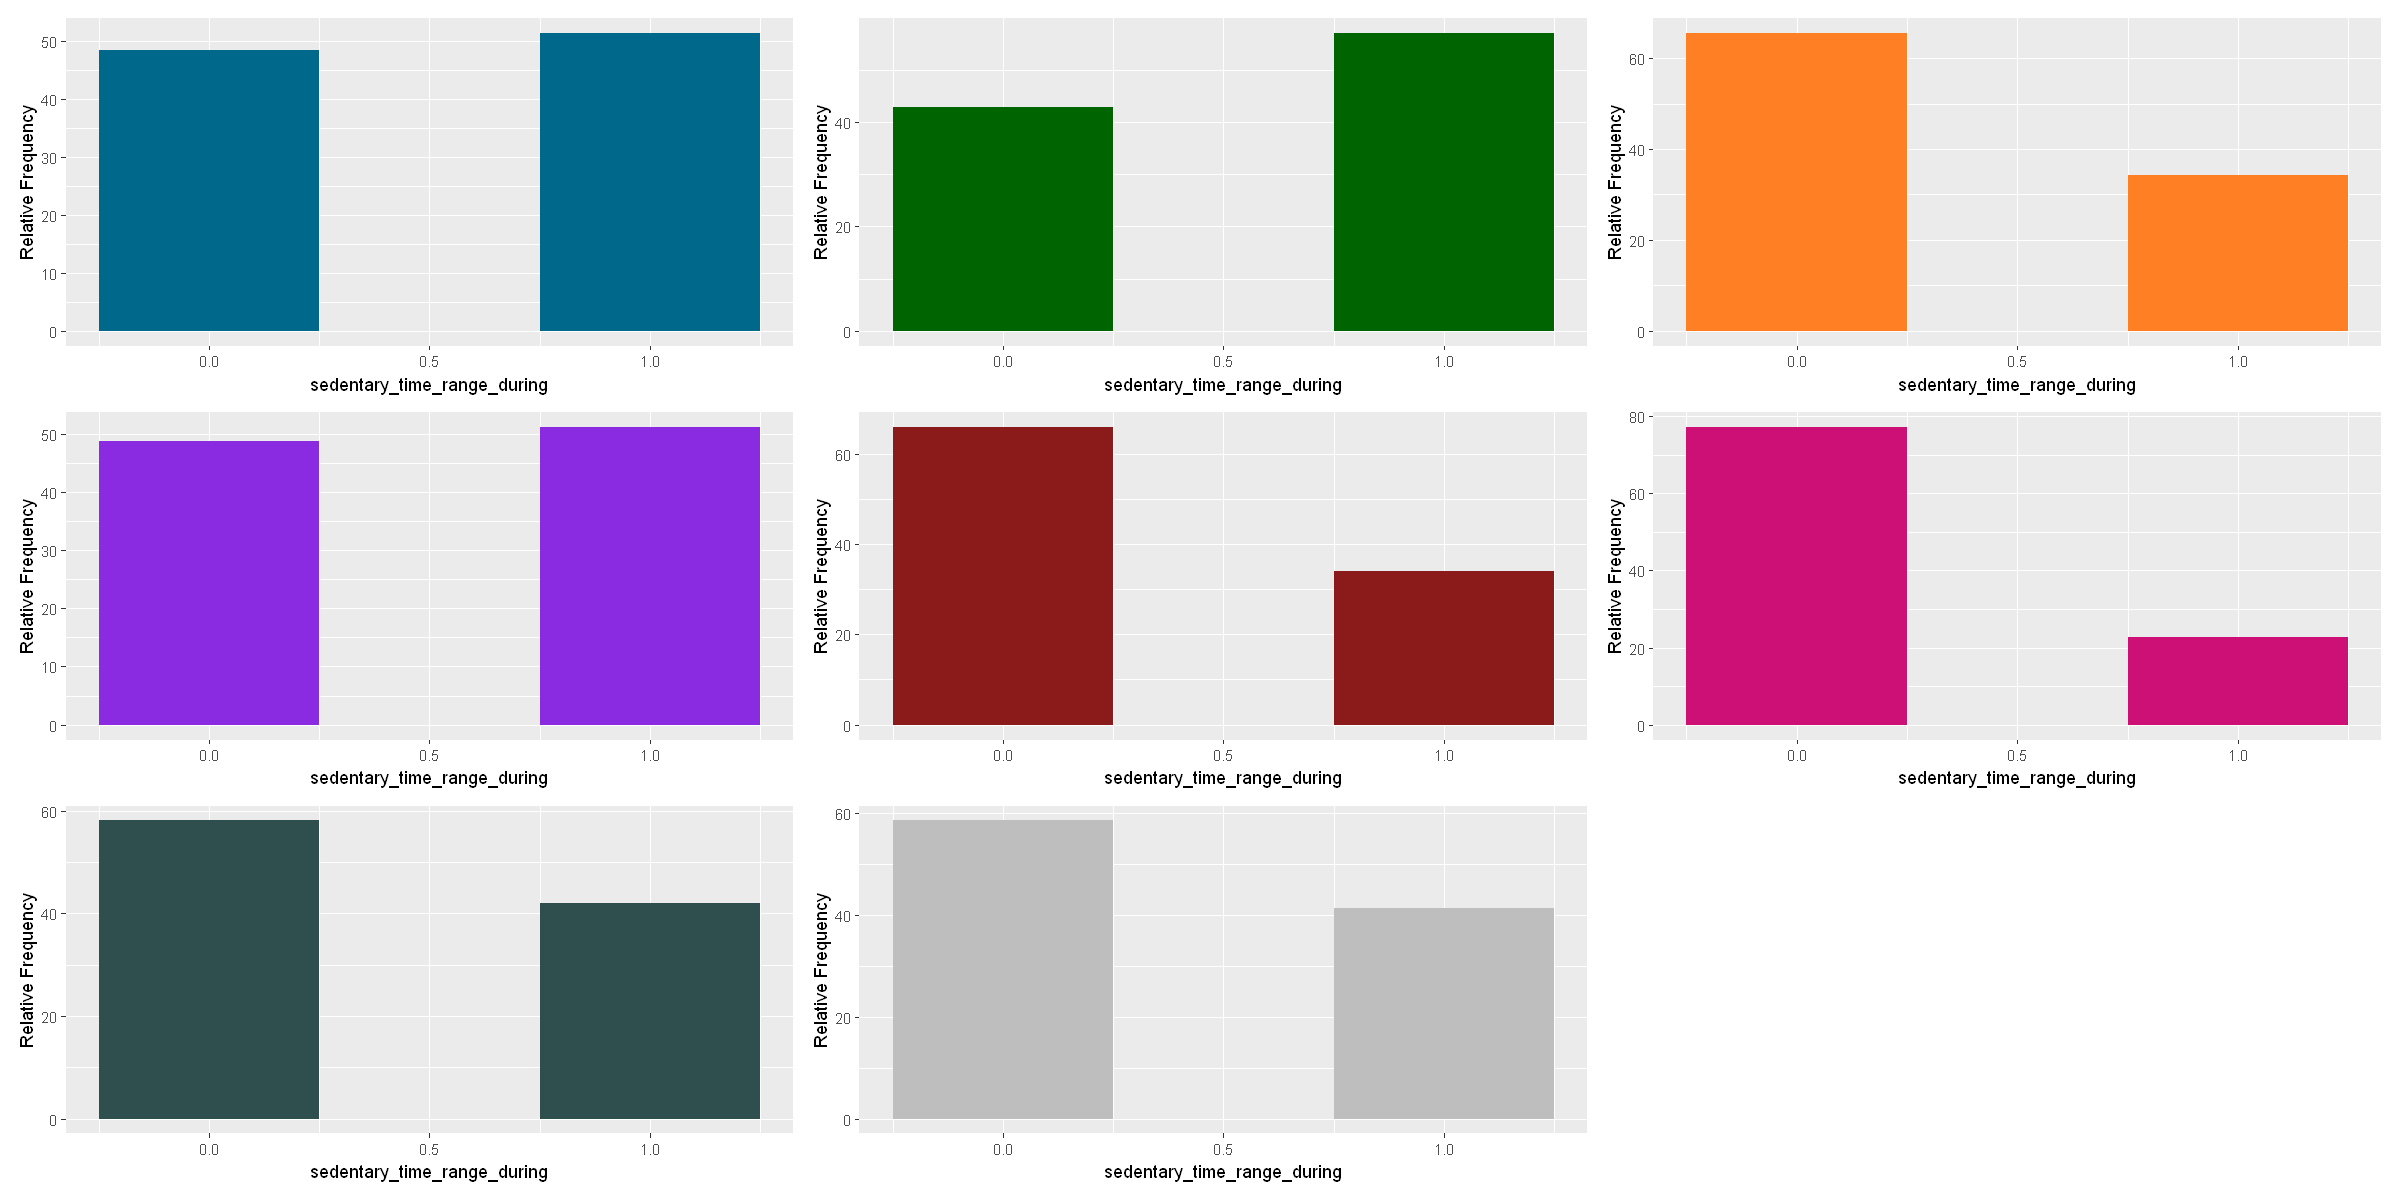

In [172]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=sedentary_time_range_during	, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 3,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Exercise Intensity

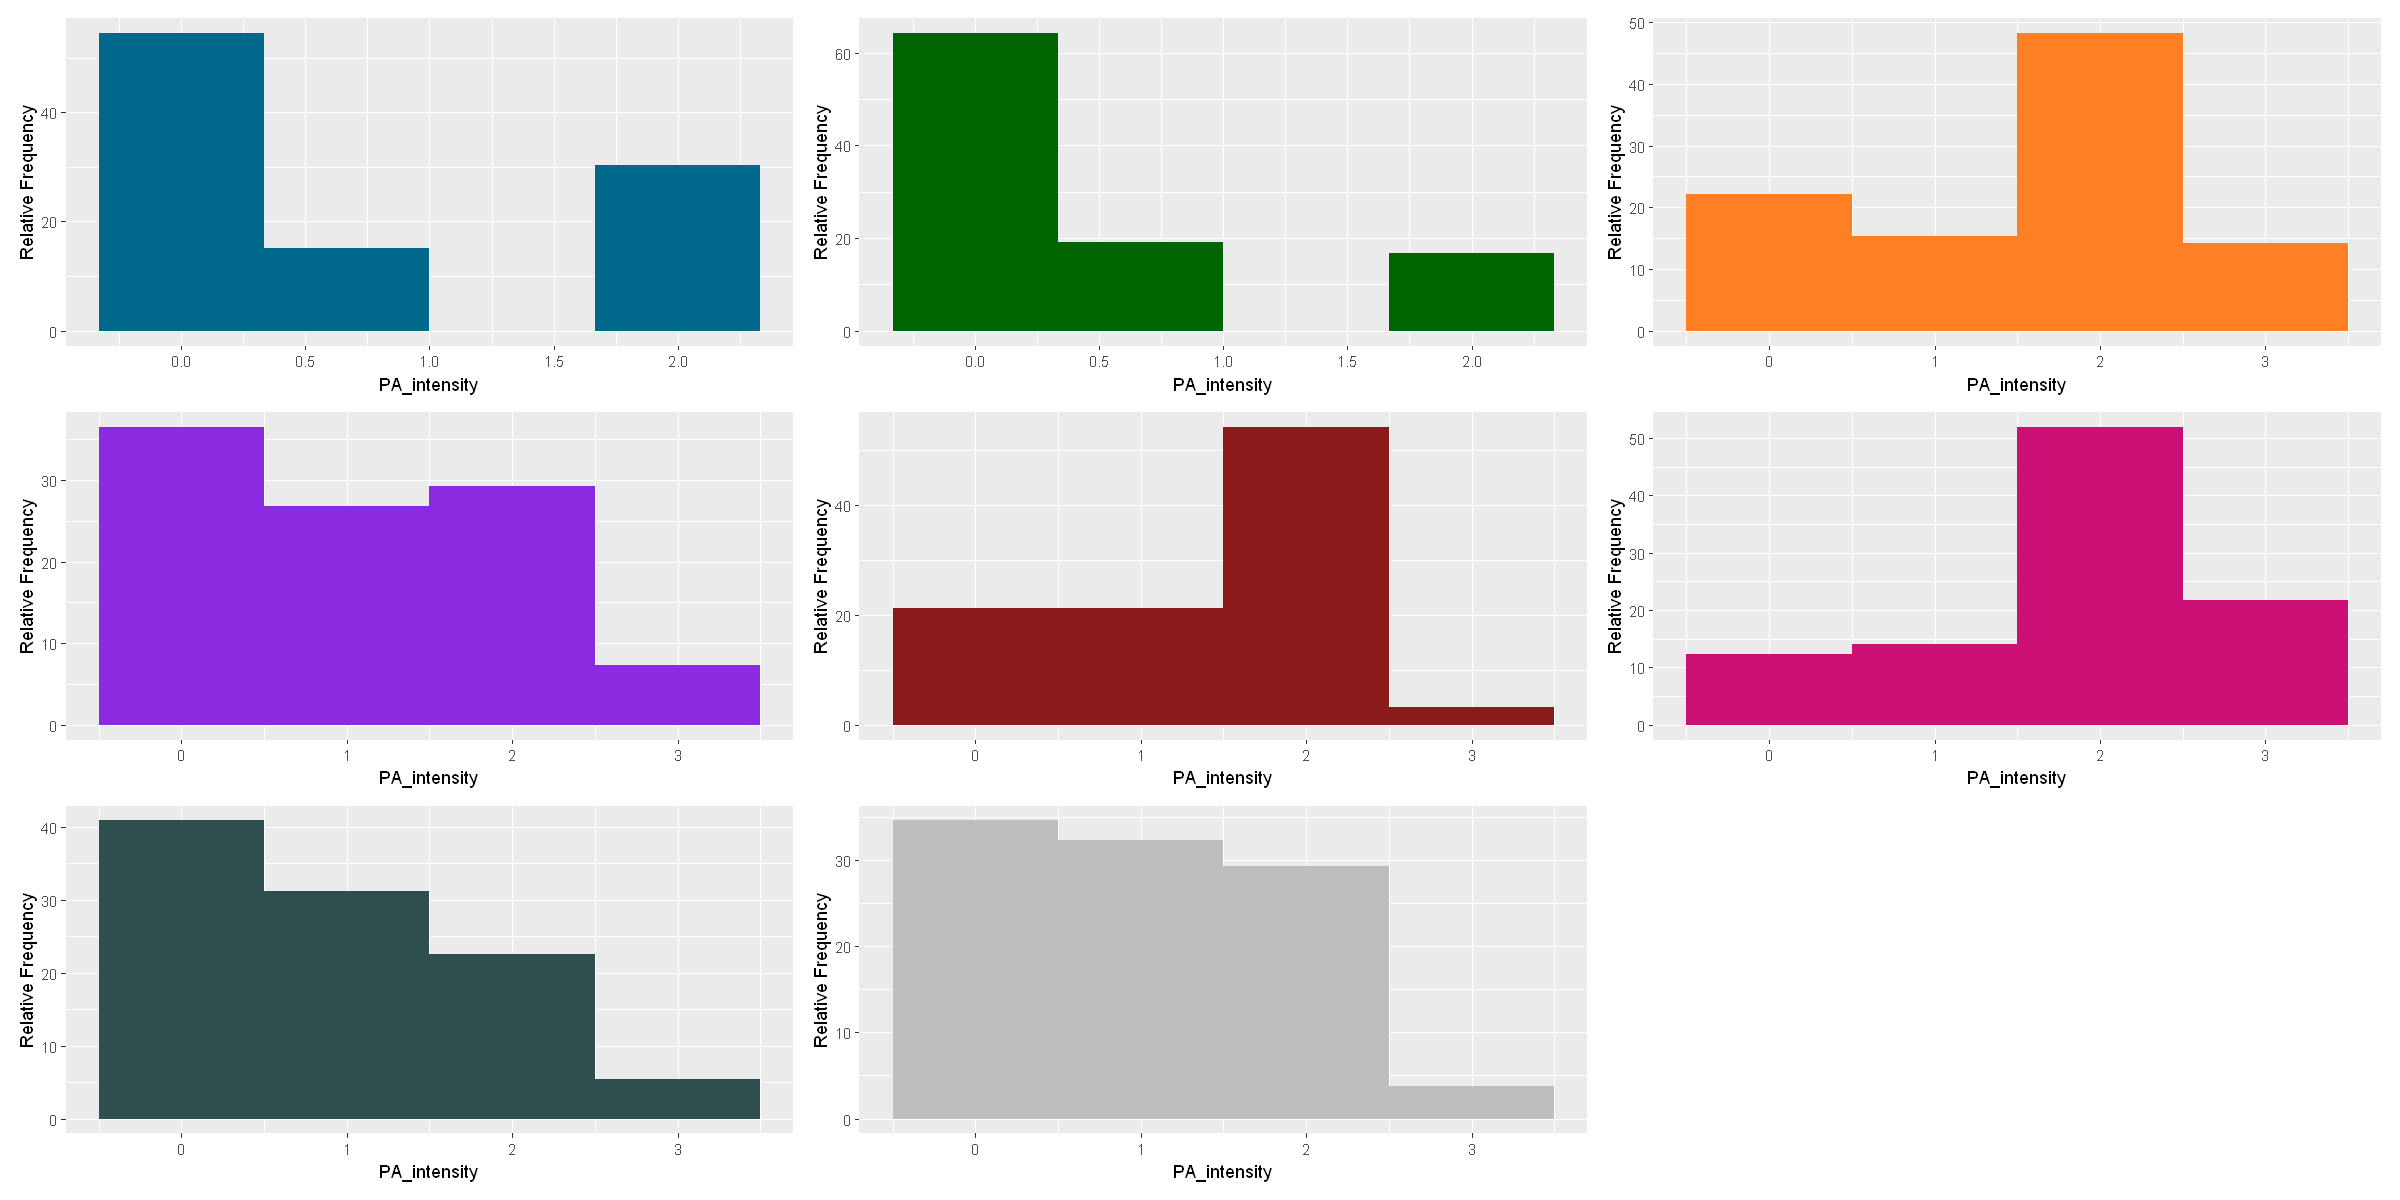

In [173]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_intensity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Exercise Duration

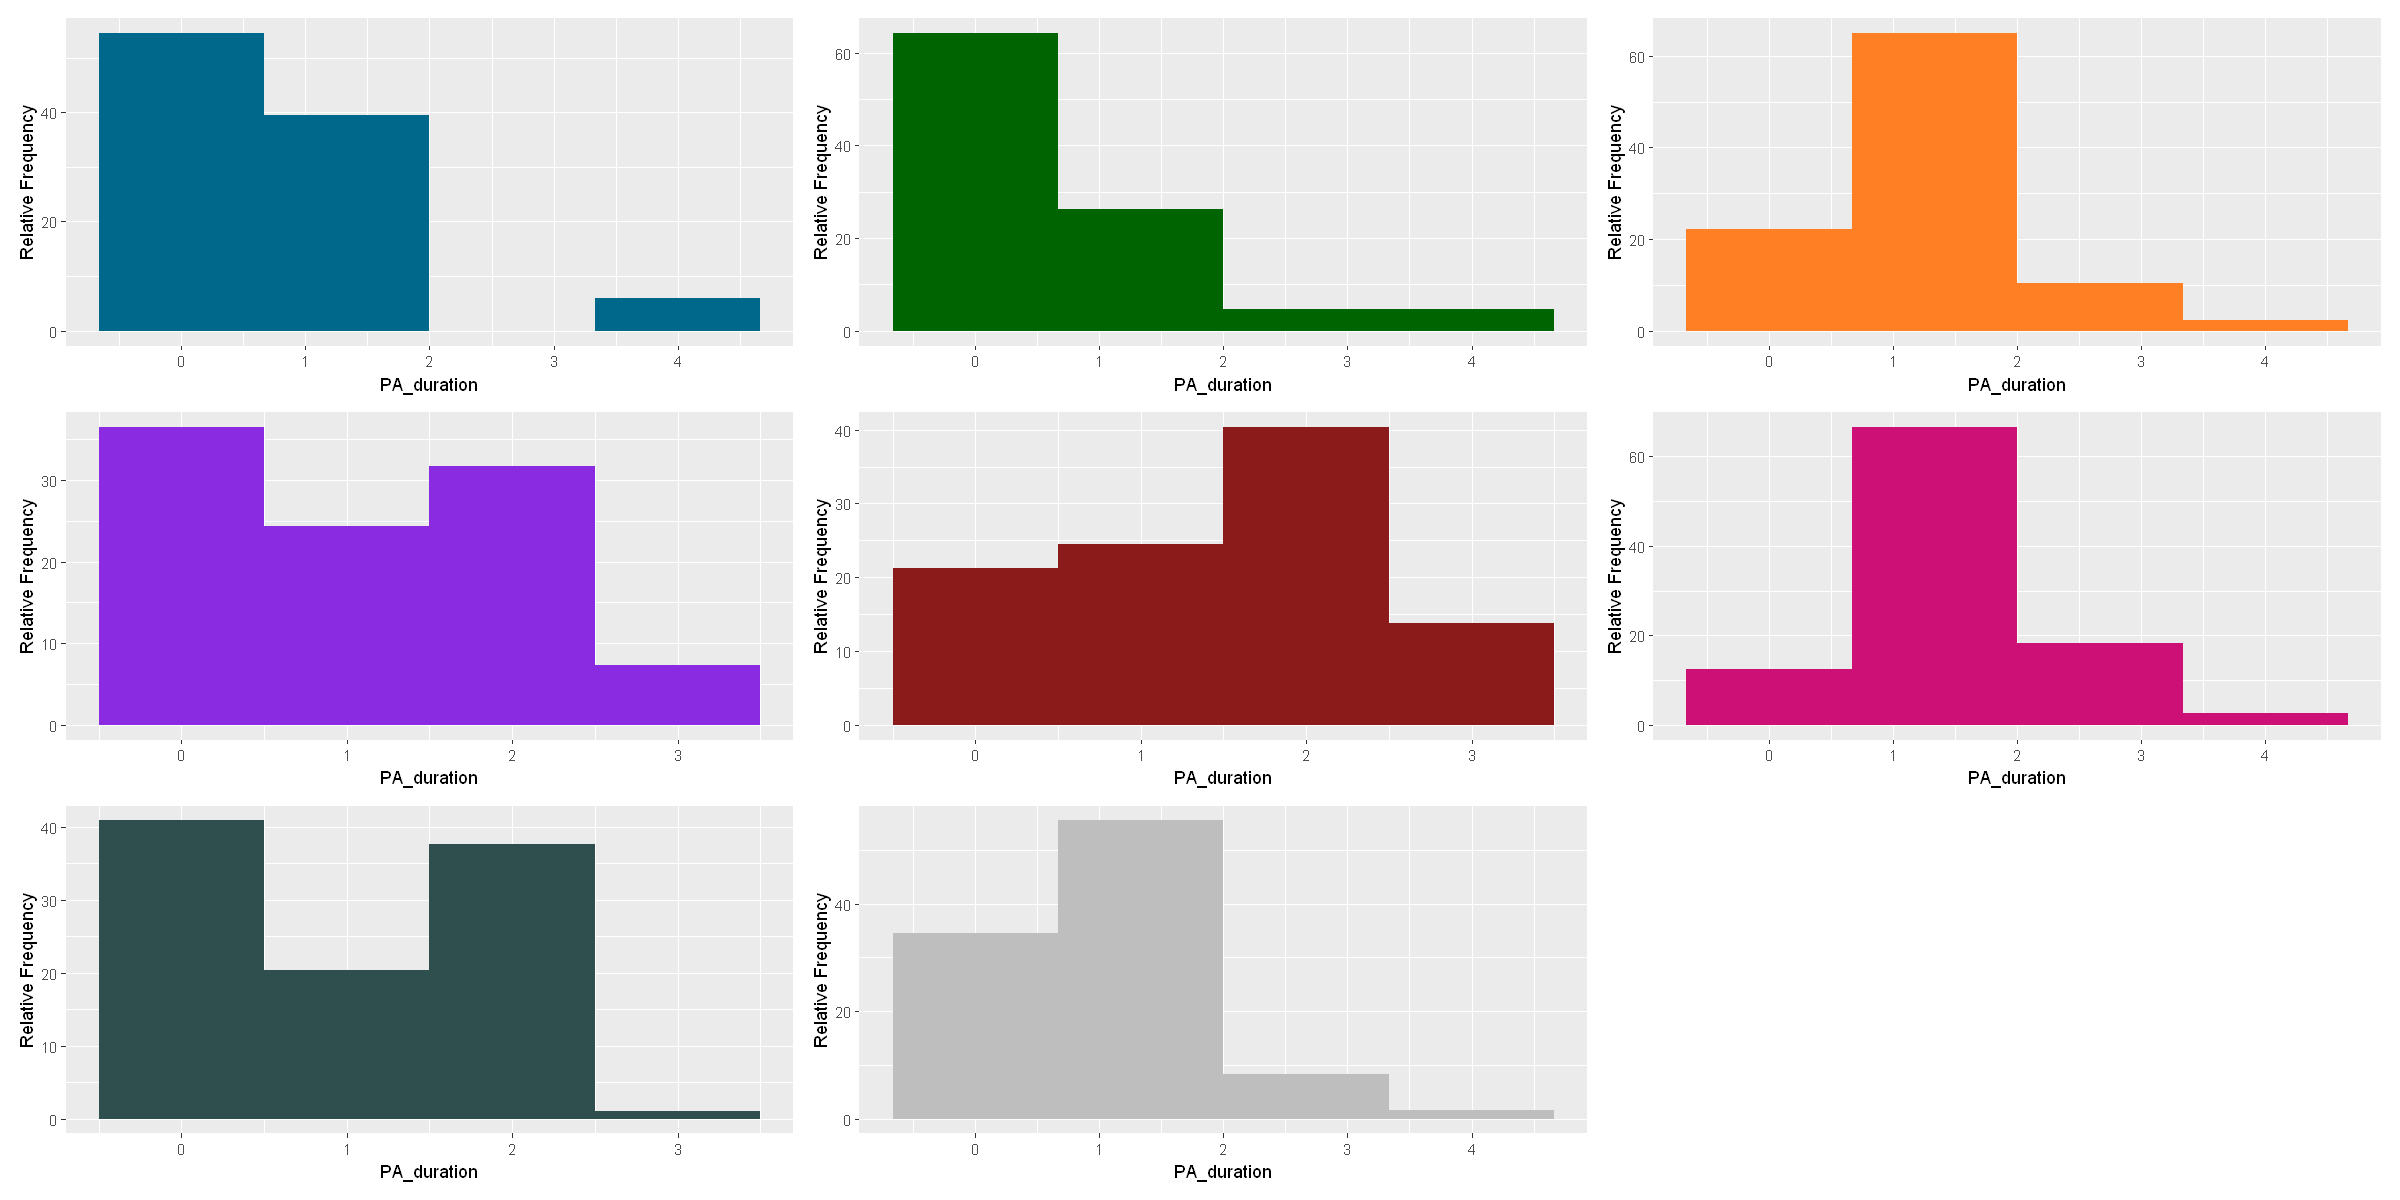

In [174]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_duration, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Exercise Weekly Frequency

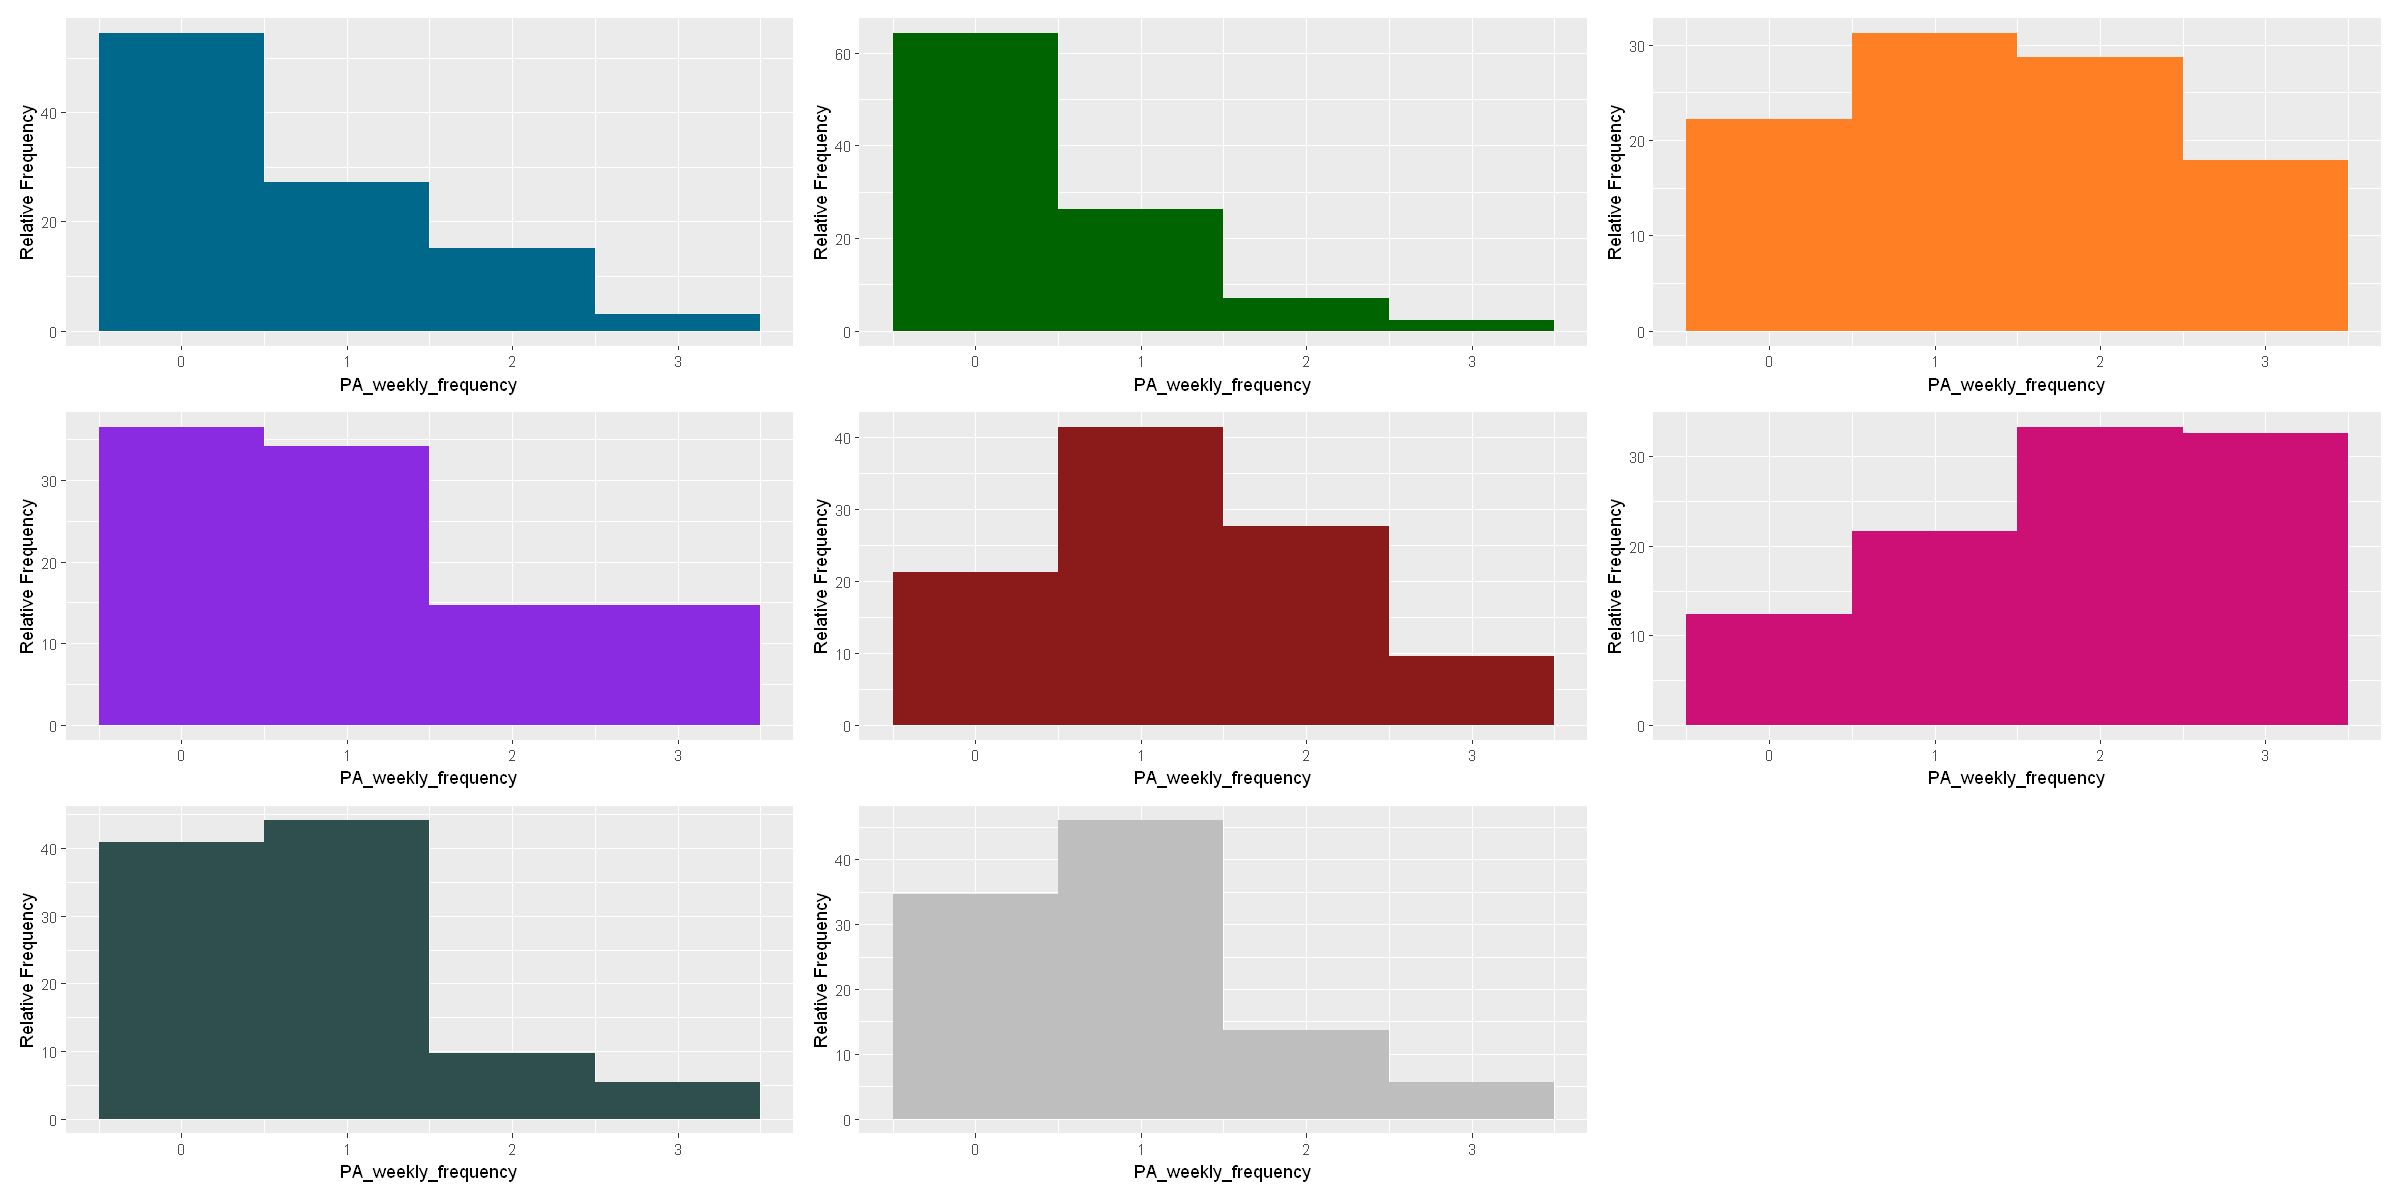

In [175]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_weekly_frequency, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Number of Exercises

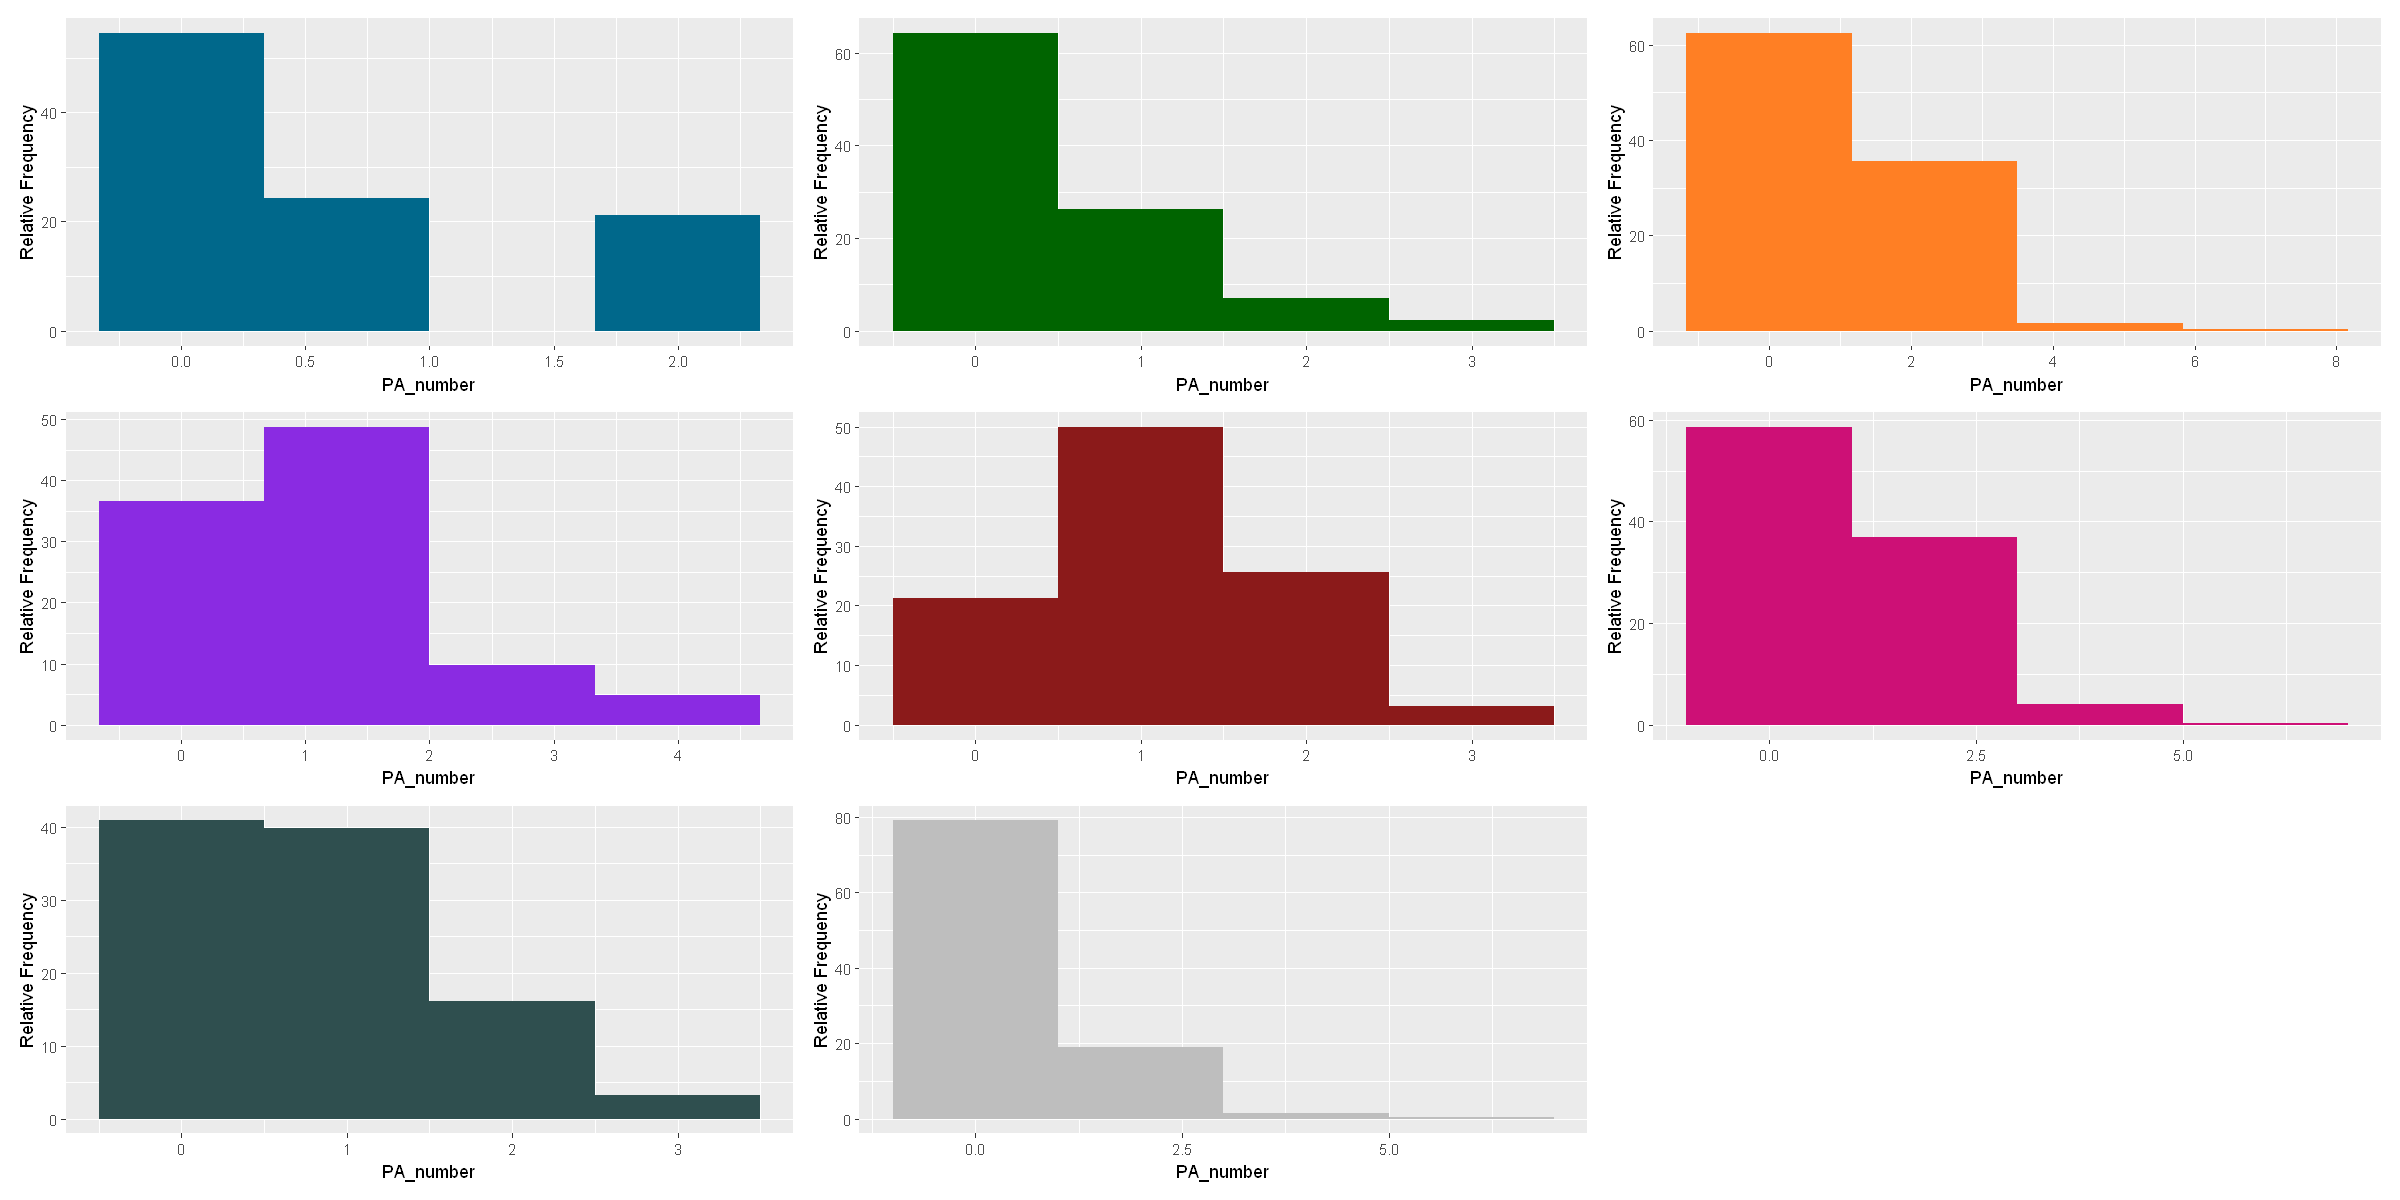

In [176]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_number, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Income Range

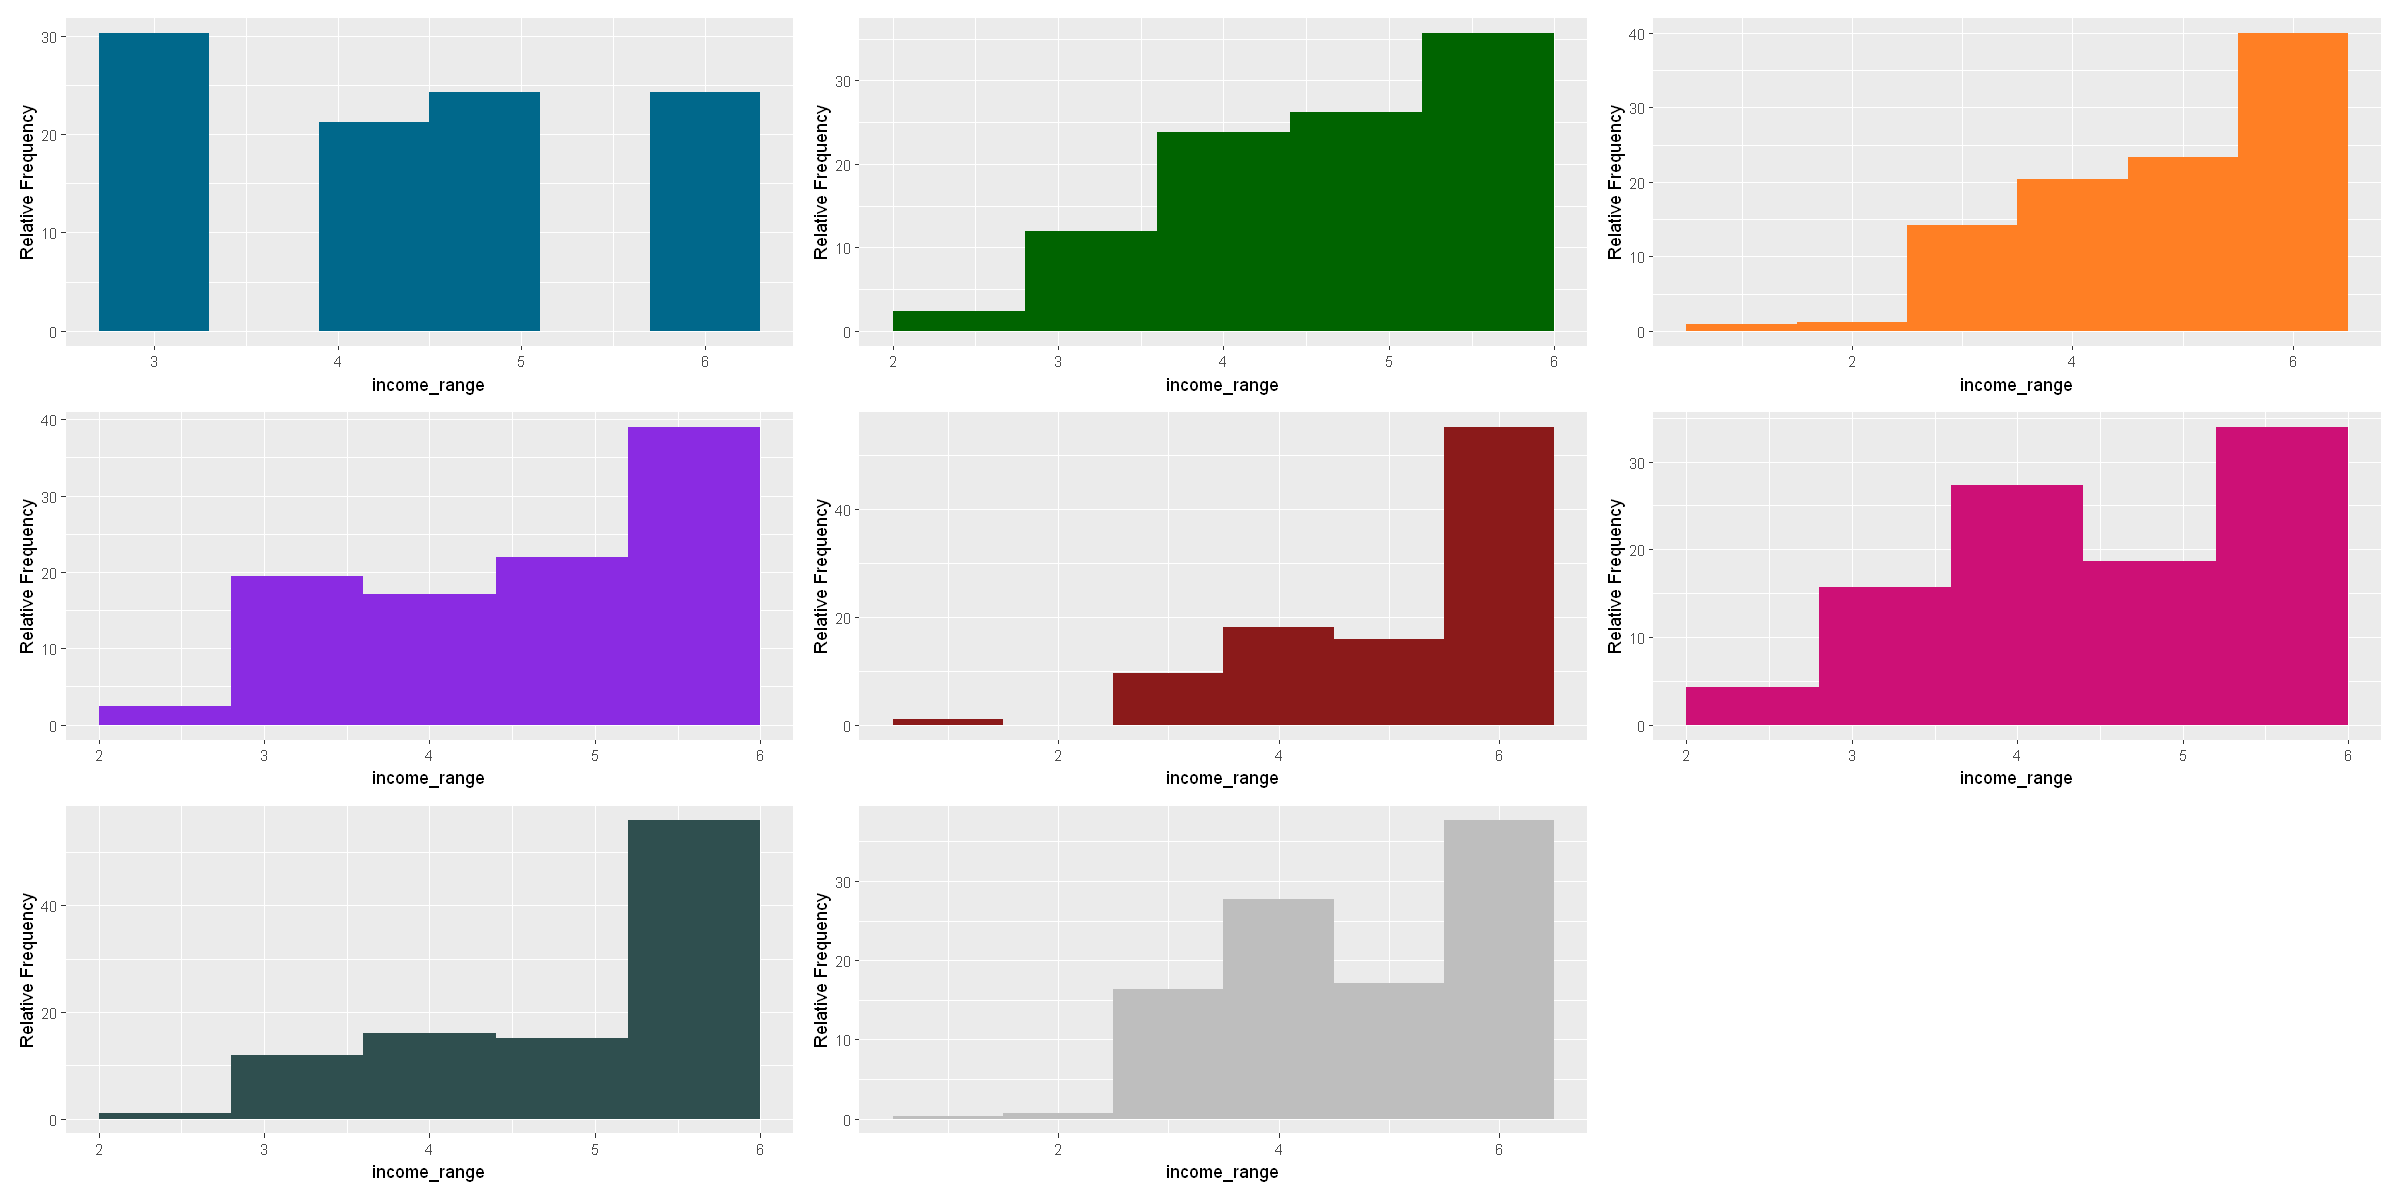

In [177]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=income_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 6,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Age Range

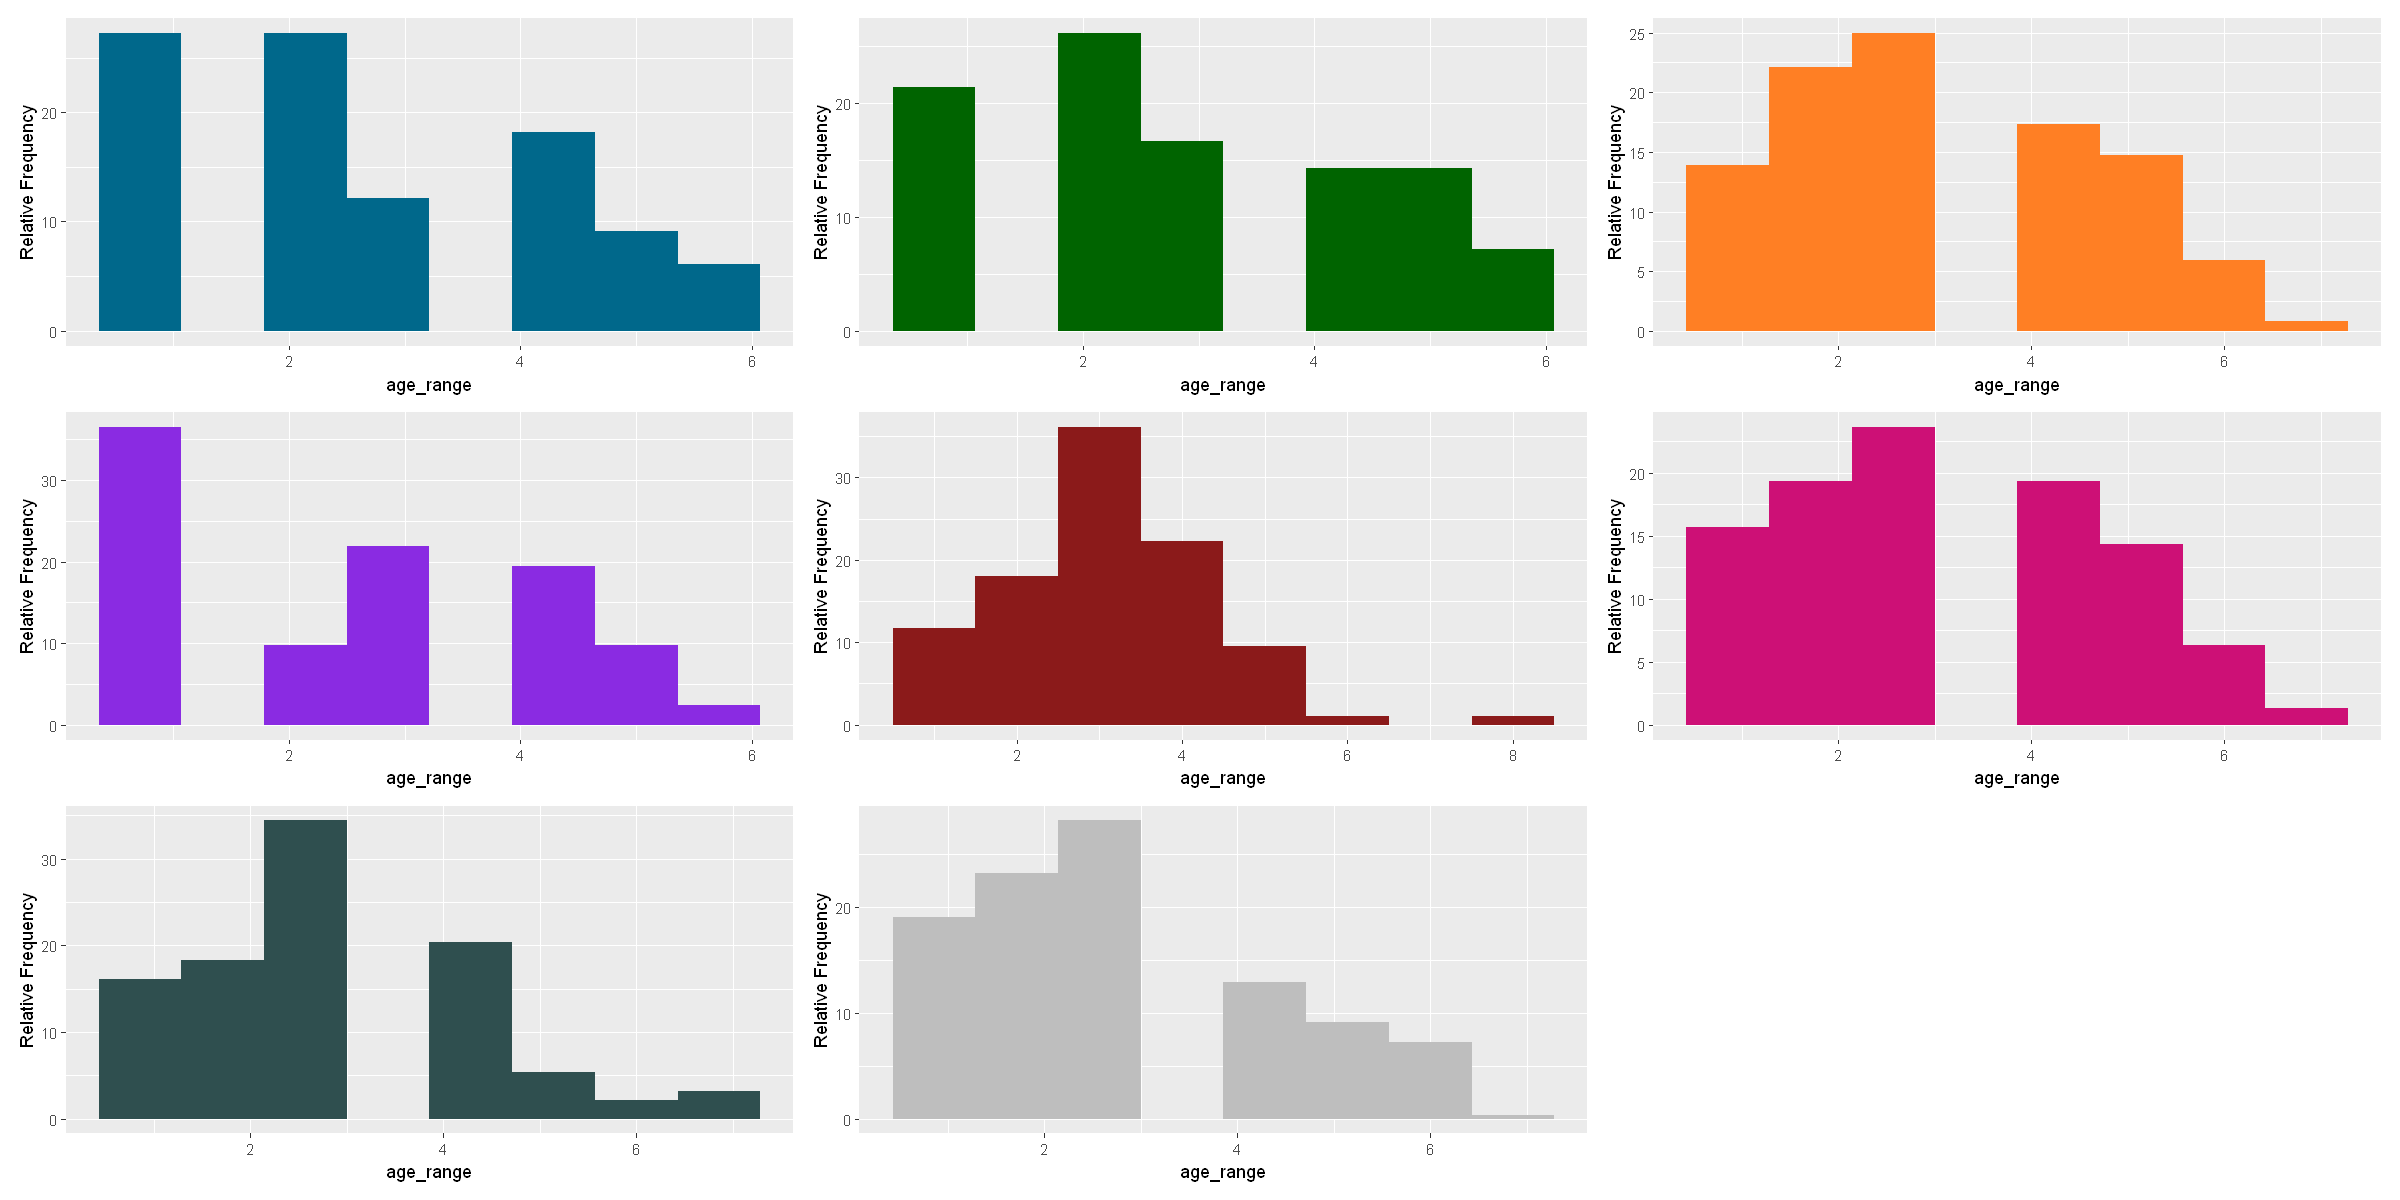

In [178]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=age_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 8,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Sex

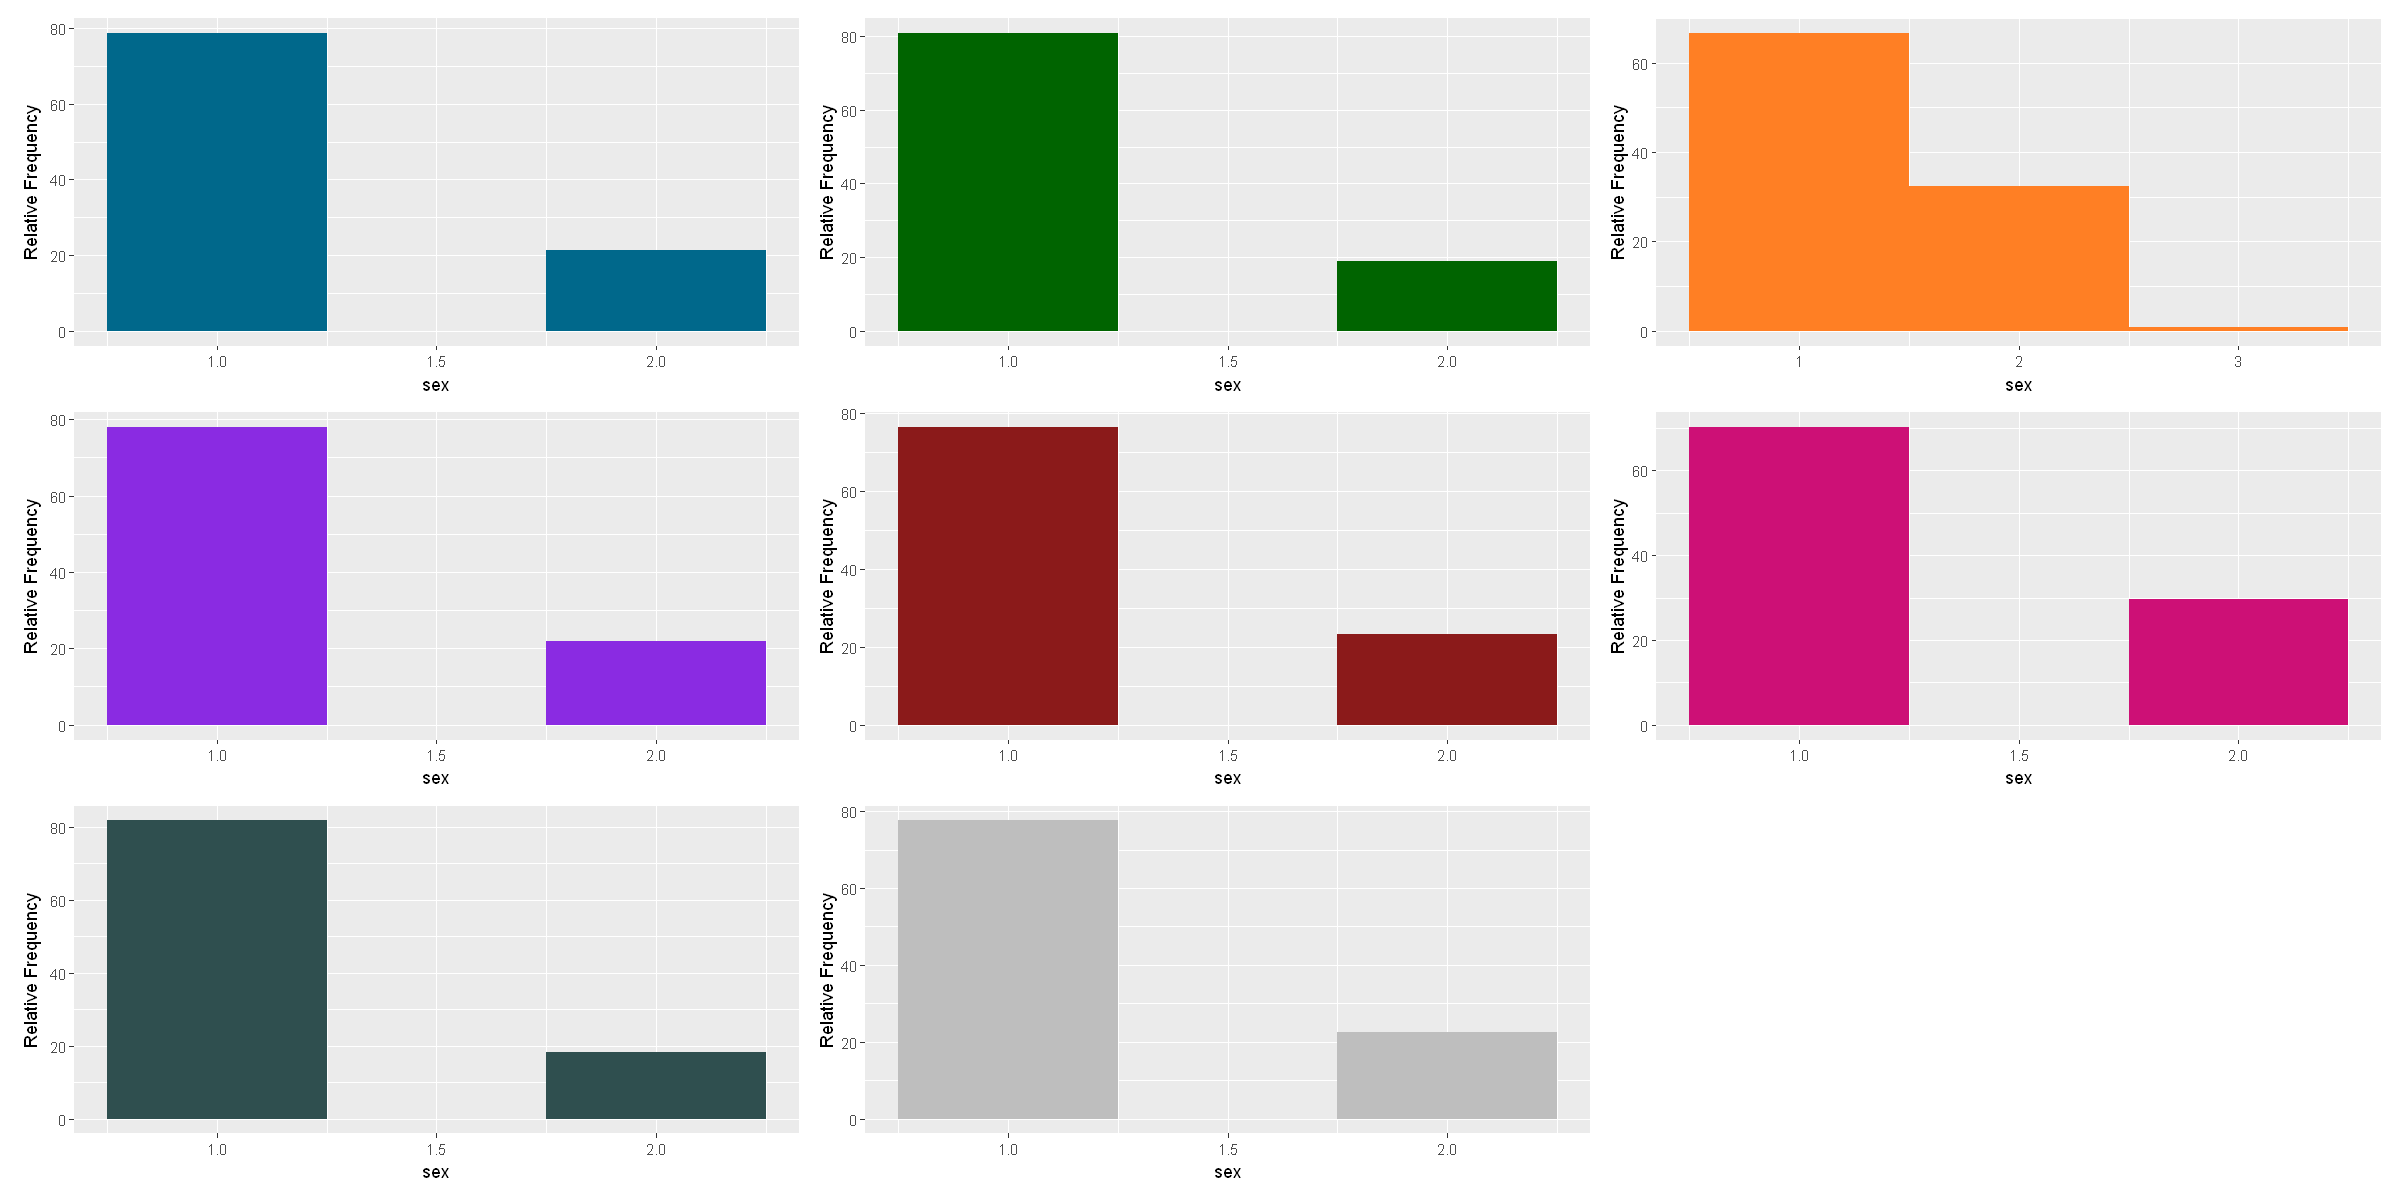

In [179]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=sex, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 3,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Scholarity

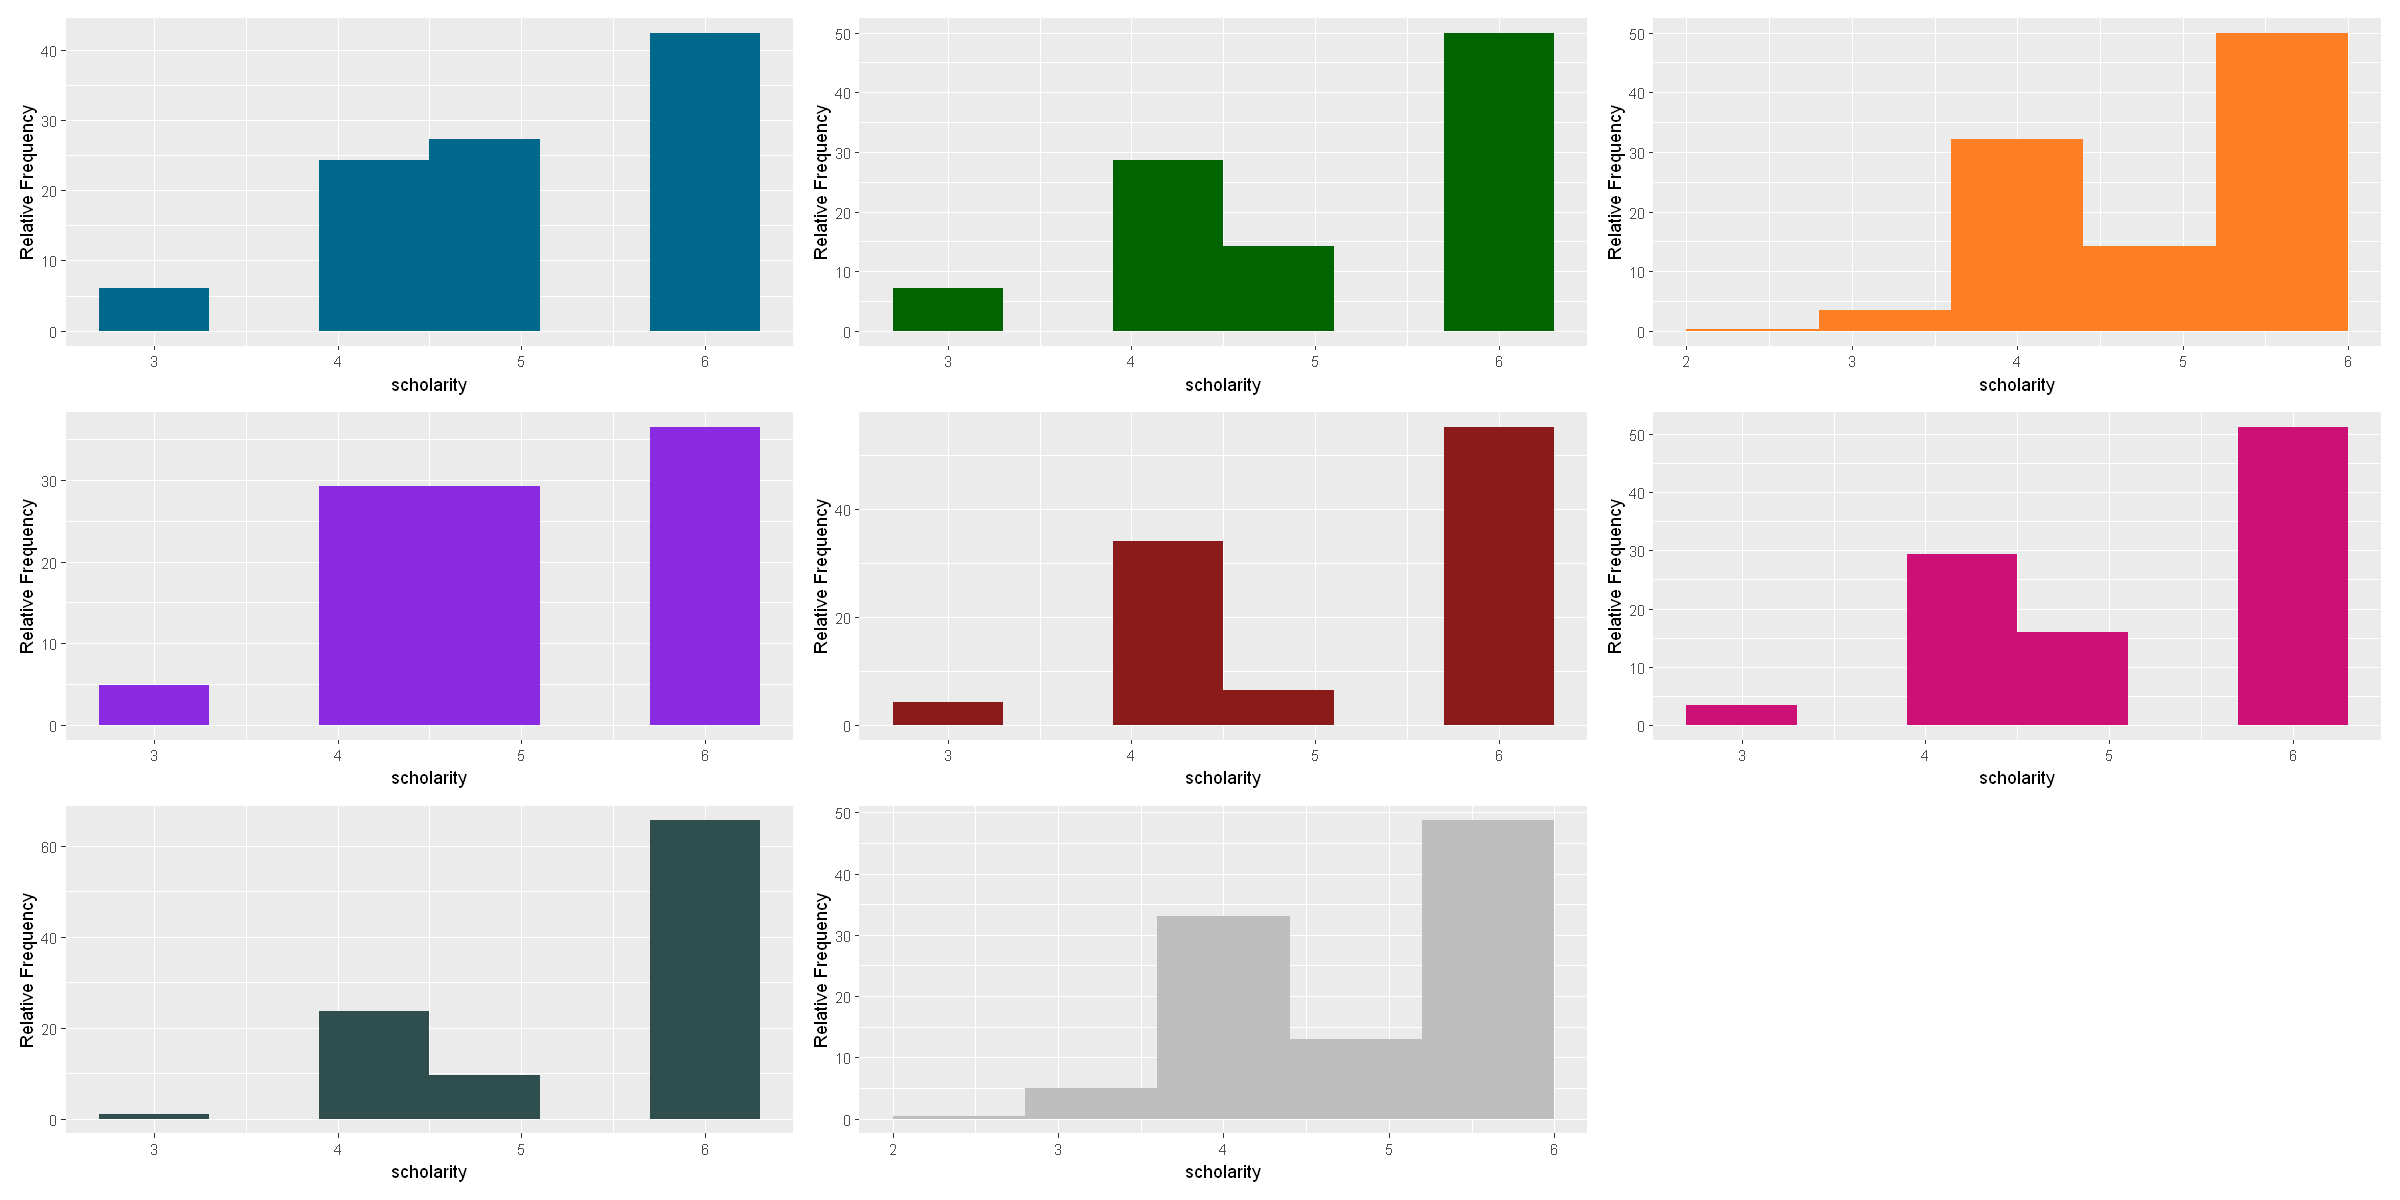

In [180]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=scholarity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 6,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### All charts

In [ ]:
df_during[, -c(ncol(df_during))] <- lapply(df_during[, -c(ncol(df_during))], as.factor)
lapply(df_during, levels)[c("volleyball", "basketball")]
df_during <- subset(df_during, select = -c(volleyball, basketball))

In [188]:
dummy <- dummyVars(" ~ .", data=df_during)
df_during_encoded <- data.frame(predict(dummy, newdata = df_during)) 

In [189]:
df_spider <- df_during_encoded %>% group_by(cluster) %>% summarise(
                                    practice = sum(PA_practice_during.1),
                                    sedentary = sum(sedentary_time_range_during.1),
                                    intesity1 = sum(PA_intensity.1),
                                    intesity2 = sum(PA_intensity.2),
                                    intesity3 = sum(PA_intensity.3),
                                    duration1 = sum(PA_duration.1),
                                    duration2 = sum(PA_duration.2),
                                    duration3 = sum(PA_duration.3),
                                    duration4 = sum(PA_duration.4),
                                    frequency1 = sum(PA_weekly_frequency.1),
                                    frequency2 = sum(PA_weekly_frequency.2),
                                    frequency3 = sum(PA_weekly_frequency.3)
                                )
df_spider <- df_spider[, -c(1)]
df_spider

practice,sedentary,intesity1,intesity2,intesity3,duration1,duration2,duration3,duration4,frequency1,frequency2,frequency3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15,17,5,10,0,1,12,0,2,9,5,1
15,24,8,7,0,8,3,2,2,11,3,1
274,121,54,170,50,51,178,37,8,110,101,63
26,21,11,12,3,10,13,3,0,14,6,6
74,32,20,51,3,23,38,13,0,39,26,9
263,68,42,156,65,44,156,55,8,65,100,98
55,39,29,21,5,19,35,1,0,41,9,5
172,109,85,77,10,35,111,22,4,121,36,15


In [190]:
max_min <- data.frame(
    practice = c(300, 0),
    sedentary = c(300, 0),
    intesity1 = c(300, 0),
    intesity2 = c(300, 0),
    intesity3 = c(300, 0),
    duration1 = c(300, 0),
    duration2 = c(300, 0),
    duration3 = c(300, 0),
    duration4 = c(300, 0),
    frequency1 = c(300, 0),
    frequency2 = c(300, 0),
    frequency3 = c(300, 0)
)
rownames(max_min) <- c("Max", "Min")
df_spider <- rbind(max_min, df_spider)
df_spider

,practice,sedentary,intesity1,intesity2,intesity3,duration1,duration2,duration3,duration4,frequency1,frequency2,frequency3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Max,300,300,300,300,300,300,300,300,300,300,300,300
Min,0,0,0,0,0,0,0,0,0,0,0,0
1,15,17,5,10,0,1,12,0,2,9,5,1
2,15,24,8,7,0,8,3,2,2,11,3,1
3,274,121,54,170,50,51,178,37,8,110,101,63
4,26,21,11,12,3,10,13,3,0,14,6,6
5,74,32,20,51,3,23,38,13,0,39,26,9
6,263,68,42,156,65,44,156,55,8,65,100,98
7,55,39,29,21,5,19,35,1,0,41,9,5


In [191]:
create_beautiful_radarchart <- function(data, color = "#00AFBB", 
                                        vlabels = colnames(data), vlcex = 0.7,
                                        caxislabels = NULL, title = NULL, ...){
  radarchart(
    data, axistype = 1,
    # Customize the polygon
    pcol = color, pfcol = scales::alpha(color, 0.5), plwd = 2, plty = 1,
    # Customize the grid
    cglcol = "grey", cglty = 1, cglwd = 0.8,
    # Customize the axis
    axislabcol = "grey", 
    # Variable labels
    vlcex = vlcex, vlabels = vlabels,
    caxislabels = caxislabels, title = title, ...
  )
}

In [192]:
df_spider <- df_spider[c("Max", "Min", 3, 6, 8, 5, 7,  1, 2, 4), ]
df_spider

,practice,sedentary,intesity1,intesity2,intesity3,duration1,duration2,duration3,duration4,frequency1,frequency2,frequency3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Max,300,300,300,300,300,300,300,300,300,300,300,300
Min,0,0,0,0,0,0,0,0,0,0,0,0
3,274,121,54,170,50,51,178,37,8,110,101,63
6,263,68,42,156,65,44,156,55,8,65,100,98
8,172,109,85,77,10,35,111,22,4,121,36,15
5,74,32,20,51,3,23,38,13,0,39,26,9
7,55,39,29,21,5,19,35,1,0,41,9,5
1,15,17,5,10,0,1,12,0,2,9,5,1
2,15,24,8,7,0,8,3,2,2,11,3,1


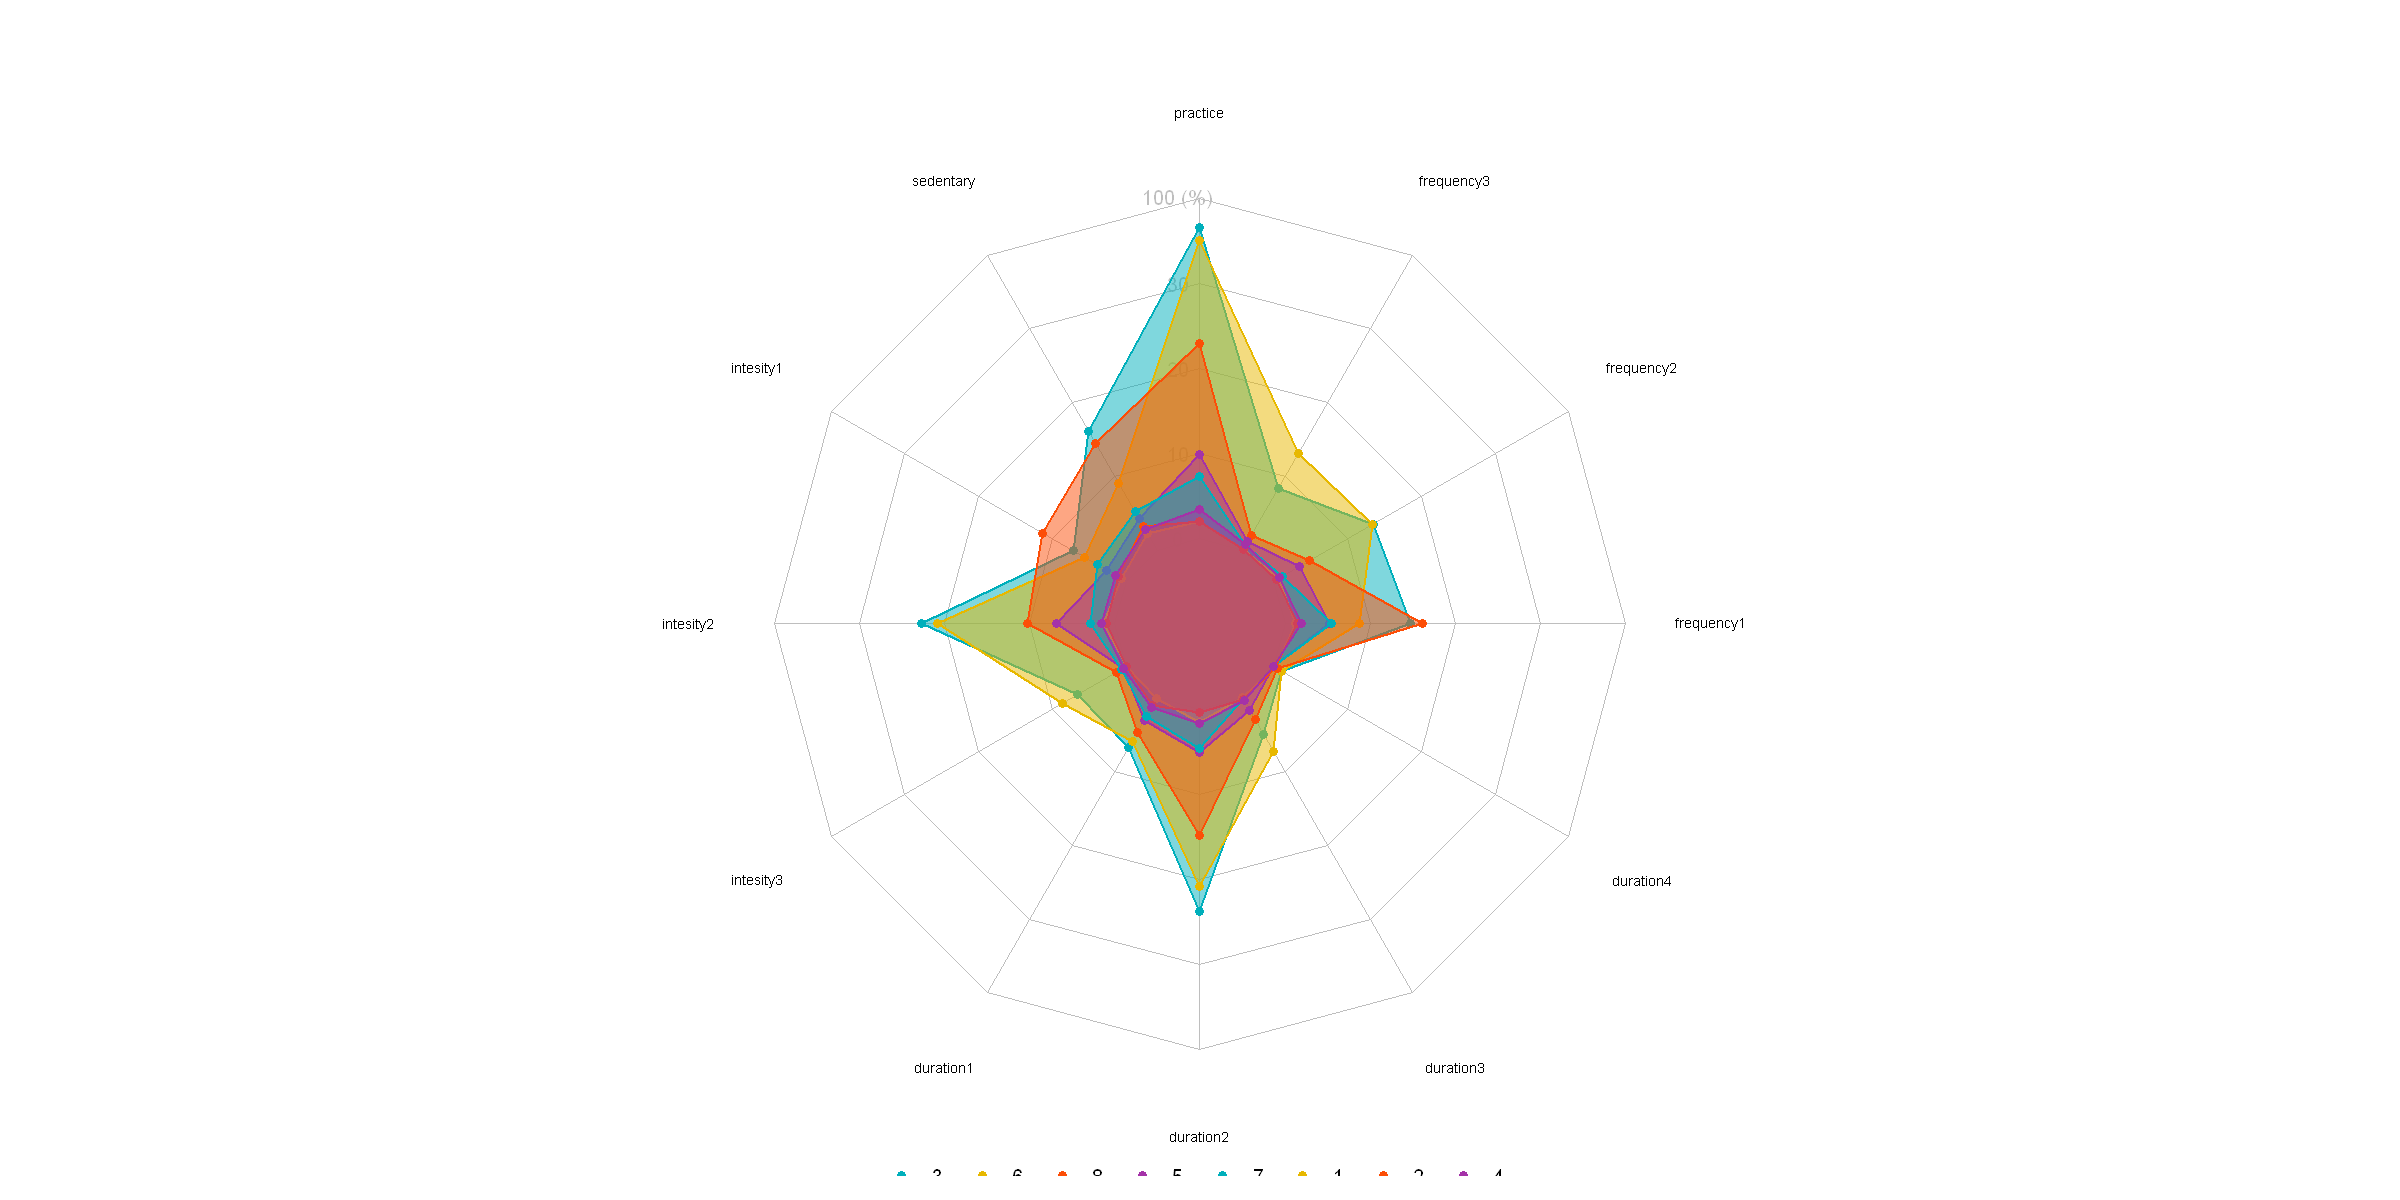

In [193]:

colors <-  c("#00AFBB", "#E7B800", "#FC4E07", '#a432a8')
titles <- c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6", "Cluster 7", "Cluster 8")
op <- par(mar = c(1, 3, 3, 3))


create_beautiful_radarchart(
  data = df_spider, 
  caxislabels = c(0, 10, 20, 30),
  color = colors,

)


legend(
  x = "bottom", legend = rownames(df_spider[-c(1,2),]), horiz = TRUE,
  bty = "n", pch = 20 , col =colors,
  text.col = "black", cex = 1, pt.cex = 1.5
)
par(op)